In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# Read the data from "World_cup_2023.csv" into the 'World_cup' DataFrame
World_cup = pd.read_csv("World_cup_2023.csv")

# Read the data from "results.csv" into the 'results' DataFrame
results = pd.read_csv("results.csv")

# Read the data file
ranking = pd.read_csv("Icc_ranking.csv")

# Read the data file
fixtures = pd.read_csv("Fixtures.csv")

In [3]:
# Display the first few rows of the World_cup DataFrame.
World_cup.head()

,Team_name,Team_ranking,Titles,Win_percentage_ODI,WC_matches,WC_match_won,Win_percent_WC,WC_match_loss,Loss_percent_WC,Tied,No_result,World_cup_winner,Recent_points,Rating
0,Australia,1,5,60.73,94,69,73.40,23,24.46,1,1,Yes,2714,118
1,Pakistan,2,1,52.78,79,45,56.96,32,40.50,0,2,Yes,2316,116
2,India,3,2,52.38,84,53,63.09,29,34.52,1,1,Yes,3807,115
3,New Zealand,4,0,45.89,89,54,60.67,33,37.07,1,1,No,2806,104
4,England,5,1,50.32,83,48,57.83,32,38.55,2,1,Yes,2426,101


In [4]:
# Display the first few rows of the World_cup DataFrame.
results.head()

,Date,Team_1,Team_2,Winner,Margin,Ground
0,17/04/2015,Bangladesh,Pakistan,Bangladesh,won by 79 runs,Shere Bangla National Stadium
1,19/04/2015,Bangladesh,Pakistan,Bangladesh,won by 7 wickets,Shere Bangla National Stadium
2,22/04/2015,Bangladesh,Pakistan,Bangladesh,won by 8 wickets,Shere Bangla National Stadium
3,08/05/2015,Ireland,England,No result,No result,The Village
4,26/05/2015,Pakistan,Zimbabwe,Pakistan,won by 41 runs,Gaddafi Stadium


In [5]:
# dispaly the first few rows.
ranking.head()

,Team_ranking,Team_name,Rating
0,1,Australia,118
1,2,Pakistan,116
2,3,India,115
3,4,New Zealand,104
4,5,England,101


In [6]:
# display the first few rows.
fixtures.head()

,Round_number,Team_1,Team_2,Date,Location,Group,Result
0,1,England,New Zealand,5/10/2023,"Narendra Modi Stadium, Ahmedabad",Group A,NaN
1,1,Pakistan,Netherlands,6/10/2023,"Rajiv Gandhi International Stadium, Hyderabad",Group A,NaN
2,1,Bangladesh,Afghanistan,7/10/2023,"Himachal Pradesh Cricket Association Stadium, ...",Group A,NaN
3,1,South Africa,Sri Lanka,7/10/2023,"Arun Jaitley Stadium, Delhi",Group A,NaN
4,1,India,Australia,8/10/2023,"MA Chidambaram Stadium, Chennai",Group A,NaN


## Visualization of the Data Set:

In [7]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

### Visualization 1: Team Rankings vs. World Cup Win Percentages

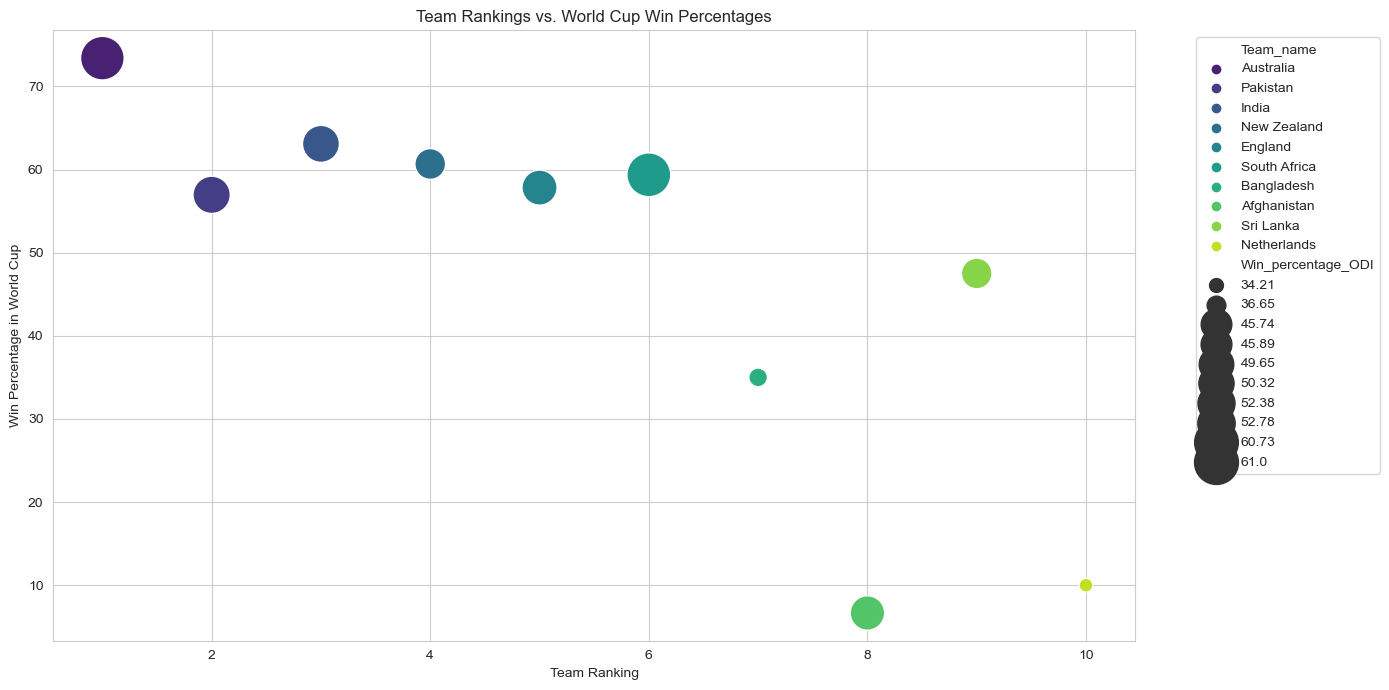

In [8]:
# Now, the plotting code should work as intended
plt.figure(figsize=(14, 7))
sns.scatterplot(x='Team_ranking', y='Win_percent_WC', data=World_cup, size='Win_percentage_ODI', hue='Team_name', sizes=(100, 1000), palette='viridis', legend='full')
plt.title('Team Rankings vs. World Cup Win Percentages')
plt.xlabel('Team Ranking')
plt.ylabel('Win Percentage in World Cup')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Visualization 2: Distribution of World Cup Wins Among Teams

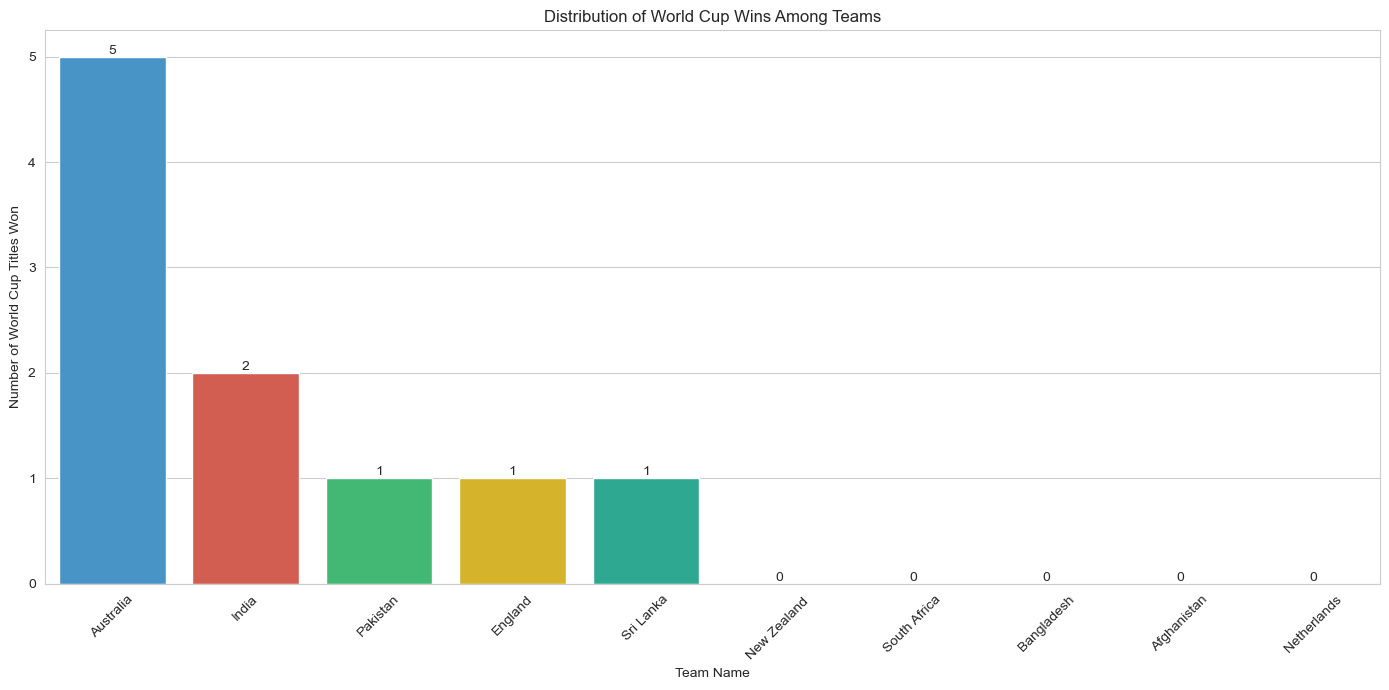

In [9]:
plt.figure(figsize=(14, 7))
# Specifying a custom list of colors
custom_colors = ['#3498db', '#e74c3c', '#2ecc71', '#f1c40f', '#1abc9c', '#9b59b6', '#34495e']
ax = sns.barplot(x='Team_name', y='Titles', data=World_cup.sort_values('Titles', ascending=False), palette=custom_colors)
plt.title('Distribution of World Cup Wins Among Teams')
plt.xlabel('Team Name')
plt.ylabel('Number of World Cup Titles Won')
plt.xticks(rotation=45)

# Adding the number of titles on the bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()), ha="center", va='bottom')

plt.tight_layout()
plt.show()

### Visualization 3: Win-Loss Record in Recent Matches

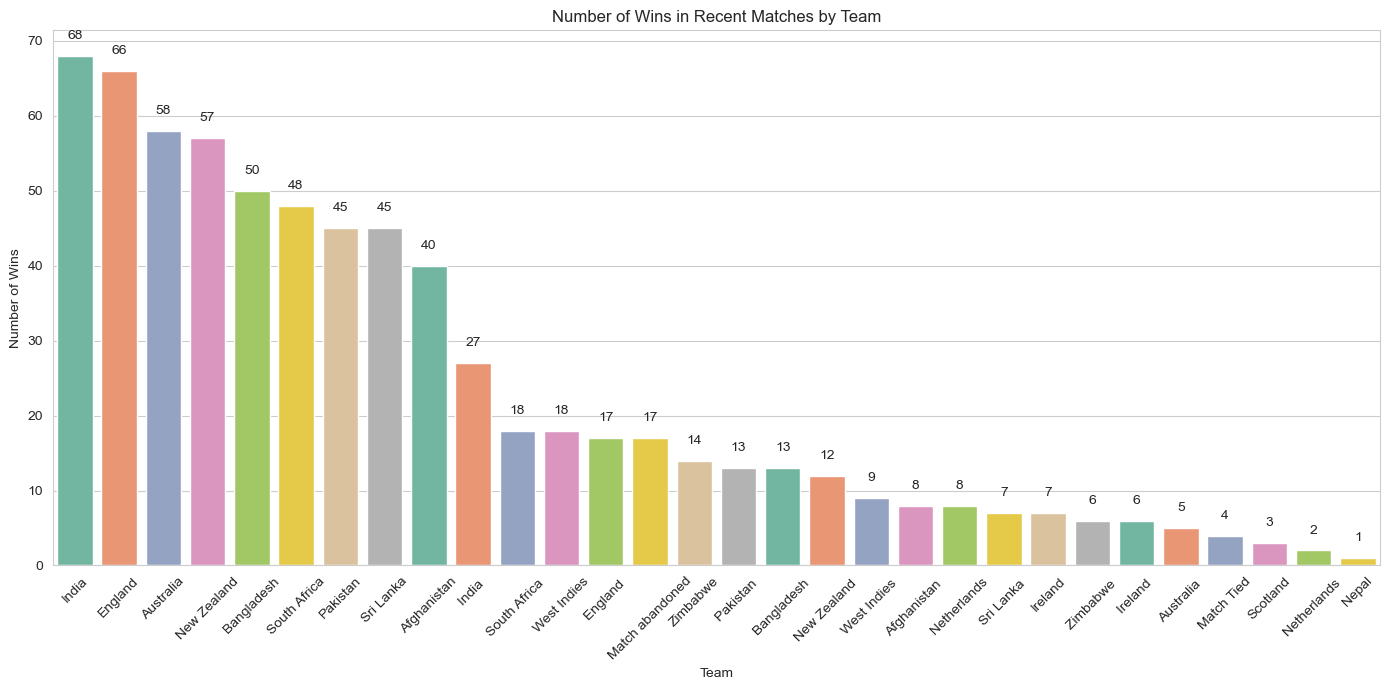

In [10]:
# Count the number of wins for each team
win_counts = results['Winner'].value_counts().reset_index()
win_counts.columns = ['Team', 'Wins']
win_counts = win_counts[win_counts['Team'] != 'No result']

plt.figure(figsize=(14, 7))
ax = sns.barplot(x='Team', y='Wins', data=win_counts.sort_values('Wins', ascending=False), palette='Set2')
plt.title('Number of Wins in Recent Matches by Team')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)

# Adding the win counts on the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

### Visualization 4: Comparisons of World Cup Performance vs. Overall ODI Performance

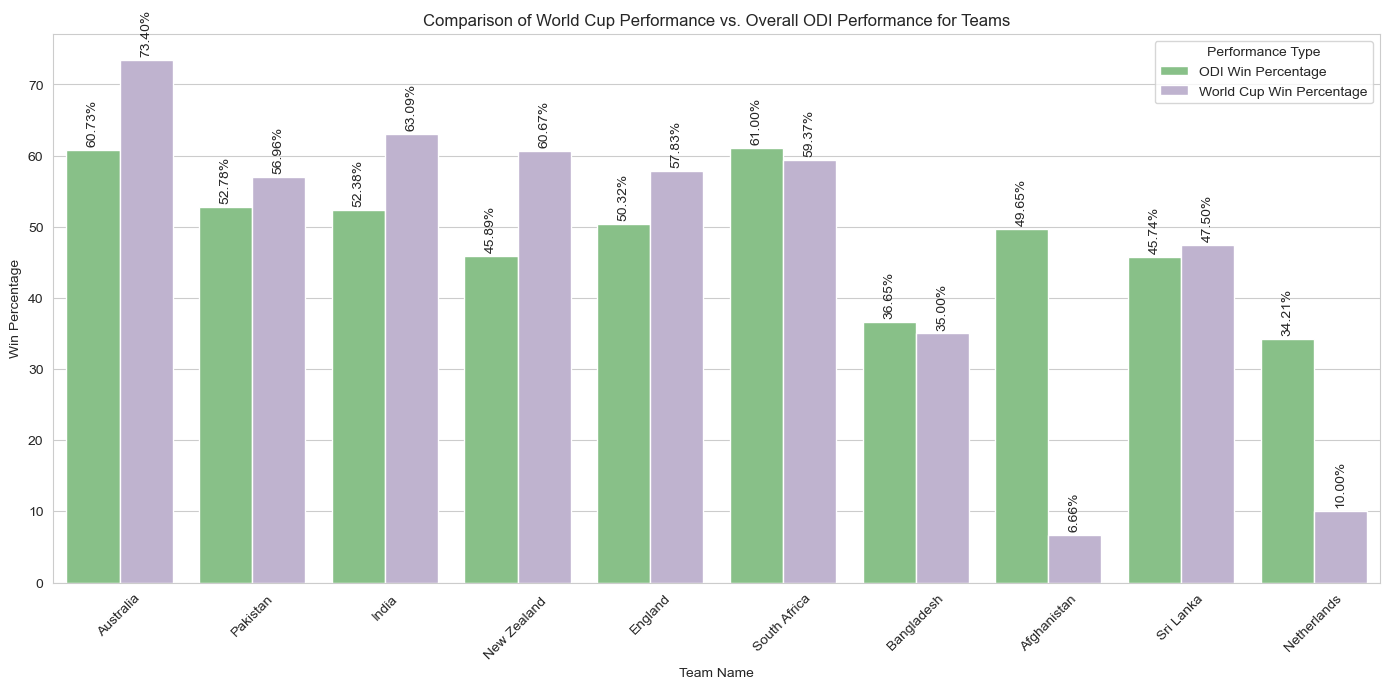

In [11]:
performance_comparison_df = World_cup[['Team_name', 'Win_percentage_ODI', 'Win_percent_WC']].melt(id_vars=['Team_name'], var_name='Performance Type', value_name='Percentage')
performance_comparison_df['Performance Type'] = performance_comparison_df['Performance Type'].map({'Win_percentage_ODI': 'ODI Win Percentage', 'Win_percent_WC': 'World Cup Win Percentage'})

plt.figure(figsize=(14, 7))
ax = sns.barplot(x='Team_name', y='Percentage', hue='Performance Type', data=performance_comparison_df, palette='Accent')
plt.title('Comparison of World Cup Performance vs. Overall ODI Performance for Teams')
plt.xlabel('Team Name')
plt.ylabel('Win Percentage')
plt.xticks(rotation=45)
plt.legend(title='Performance Type')

# Adding the percentage values on the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.5, '{:1.2f}%'.format(height), ha="center", va='bottom', rotation=90)

plt.tight_layout()
plt.show()

### Visualization 5: World Cup Matches Played by Each Team

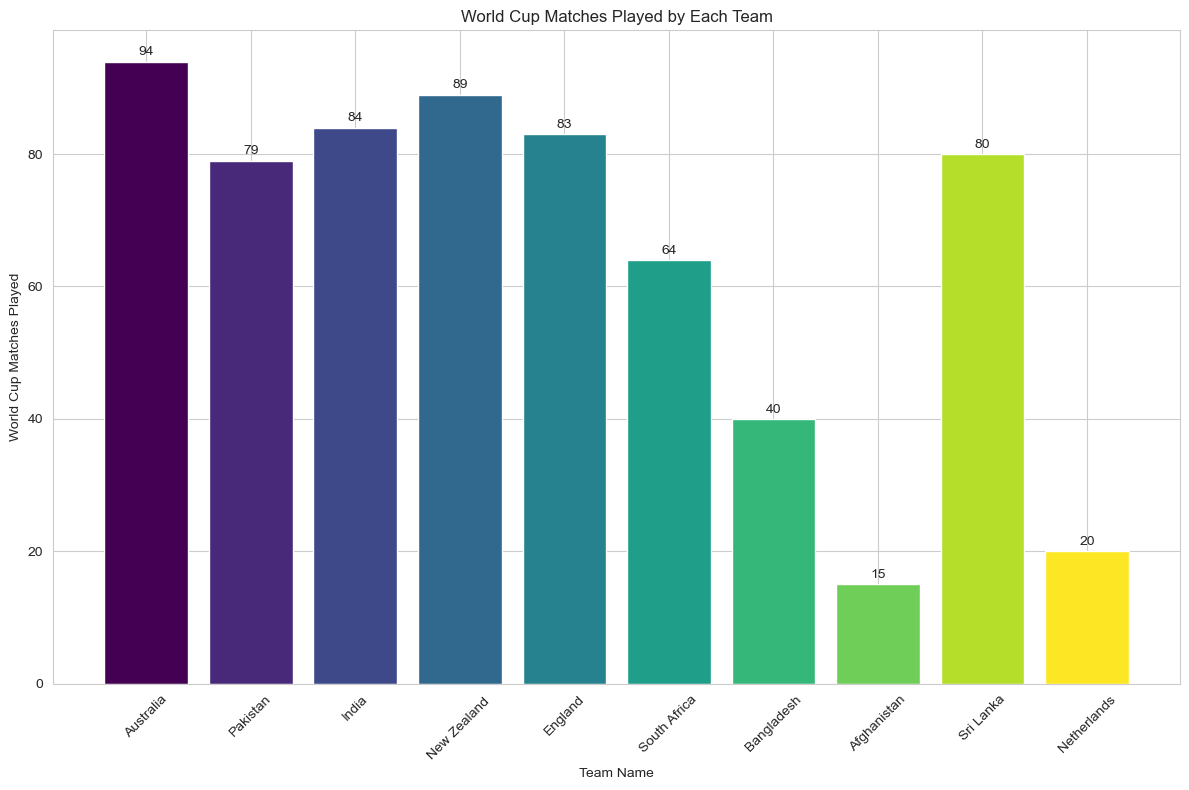

In [12]:
plt.figure(figsize=(12, 8))

# Using a colormap to generate different colors for each bar
cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(World_cup['Team_name'])))

bars = plt.bar(World_cup['Team_name'], World_cup['WC_matches'], color=colors)

# Adding labels and title
plt.xlabel('Team Name')
plt.ylabel('World Cup Matches Played')
plt.title('World Cup Matches Played by Each Team')
plt.xticks(rotation=45)

# Annotating each bar with the value
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, yval, ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Visualization 6: Win Percentage in World Cup 2023 with Annotations

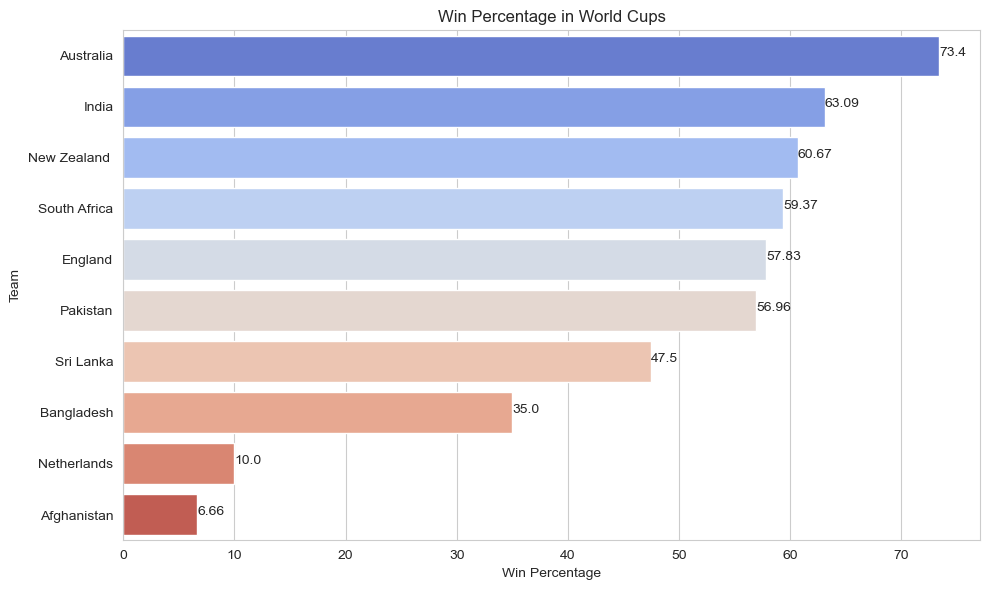

In [13]:
plt.figure(figsize=(10, 6))
win_percent_plot = sns.barplot(x="Win_percent_WC", y="Team_name", data=World_cup.sort_values(by="Win_percent_WC", ascending=False),
                               palette="coolwarm")
plt.title('Win Percentage in World Cups')
plt.xlabel('Win Percentage')
plt.ylabel('Team')
for index, value in enumerate(World_cup.sort_values(by="Win_percent_WC", ascending=False)["Win_percent_WC"]):
    plt.text(value, index, str(value))
plt.tight_layout()

plt.show()

### Visualization 7: Recent Points vs. Rating for Each Team

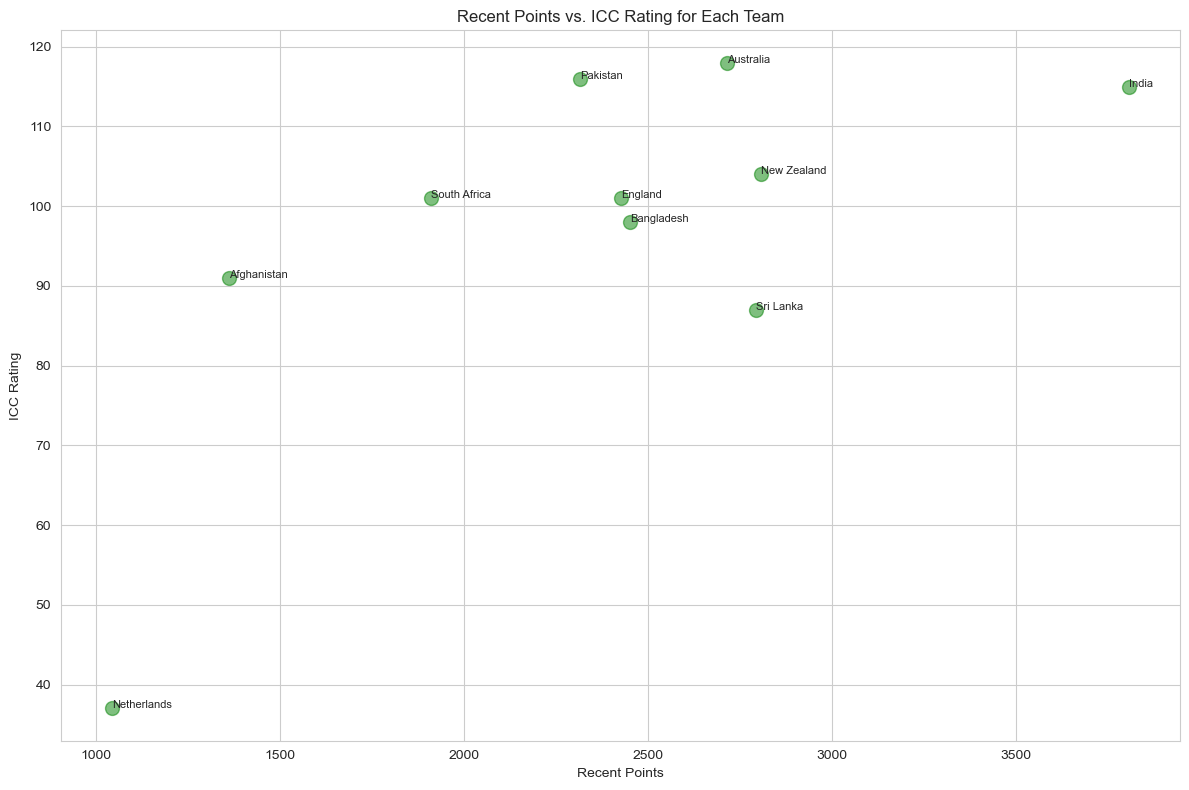

In [14]:
plt.figure(figsize=(12, 8))
plt.scatter(World_cup['Recent_points'], World_cup['Rating'], s=100, c='green', alpha=0.5)

# Adding title and labels
plt.title('Recent Points vs. ICC Rating for Each Team')
plt.xlabel('Recent Points')
plt.ylabel('ICC Rating')

# Adding annotations for each point to identify the teams
for i in range(len(World_cup)):
    plt.text(World_cup['Recent_points'][i], World_cup['Rating'][i], World_cup['Team_name'][i], fontsize=8)

plt.grid(True)  # Add grid for better readability
plt.tight_layout()  # Adjust the layout to make room for the labels
plt.show()

### Visualization 8: ICC Rankings of the Teams

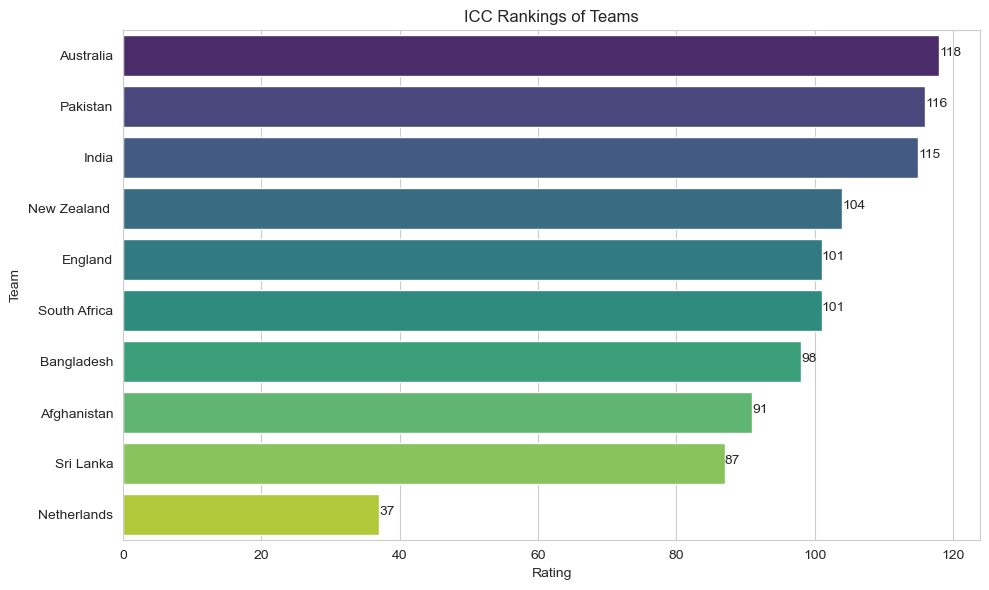

In [15]:
plt.figure(figsize=(10, 6))
ranking_plot = sns.barplot(x="Rating", y="Team_name", data=ranking.sort_values(by="Rating", ascending=False),
                           palette="viridis")
plt.title('ICC Rankings of Teams')
plt.xlabel('Rating')
plt.ylabel('Team')
for index, value in enumerate(ranking.sort_values(by="Rating", ascending=False)["Rating"]):
    plt.text(value, index, str(value))
plt.tight_layout()

## Team wise performnace Matrix:

### Indian Team performnace Matrix

### 1. India's Overall Performance in World Cups:

In [16]:
# Filter India's data from the World Cup 2023 dataset
india_wc_data = World_cup[World_cup['Team_name'] == 'India']

# Displaying India's World Cup performance statistics
india_wc_data

,Team_name,Team_ranking,Titles,Win_percentage_ODI,WC_matches,WC_match_won,Win_percent_WC,WC_match_loss,Loss_percent_WC,Tied,No_result,World_cup_winner,Recent_points,Rating
2,India,3,2,52.38,84,53,63.09,29,34.52,1,1,Yes,3807,115


### 2. Visualization of India's Win Percentage in World Cups vs. ODIs

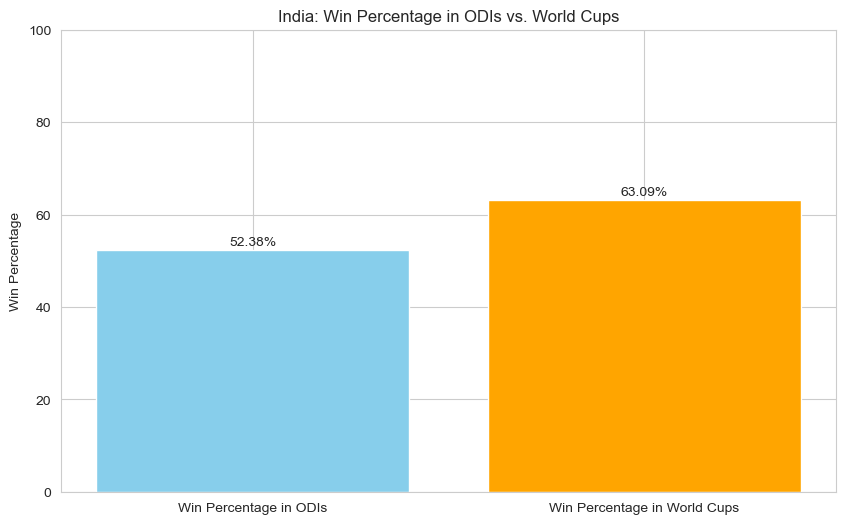

In [17]:
# Visualization: Comparing India's Win Percentage in World Cups vs. ODIs

plt.figure(figsize=(10, 6))

# Data for plotting
categories = ['Win Percentage in ODIs', 'Win Percentage in World Cups']
percentages = [india_wc_data['Win_percentage_ODI'].values[0], india_wc_data['Win_percent_WC'].values[0]]

plt.bar(categories, percentages, color=['skyblue', 'orange'])
plt.title('India: Win Percentage in ODIs vs. World Cups')
plt.ylabel('Win Percentage')
plt.ylim(0, 100)  # Setting the limit for better comparison
for i, value in enumerate(percentages):
    plt.text(i, value + 1, f"{value}%", ha='center')

plt.show()

### 3. Analyzing India's Recent Match Results

In [18]:
# Filter India's match results from the 'results' DataFrame
india_results = results[(results['Team_1'] == 'India') | (results['Team_2'] == 'India')]

# Calculate wins and losses
india_wins = india_results[india_results['Winner'] == 'India']
india_losses = india_results[(india_results['Winner'] != 'India') & (india_results['Winner'] != 'No result')]

# Counting wins and losses
india_win_count = india_wins.shape[0]
india_loss_count = india_losses.shape[0]

india_win_count, india_loss_count

(55, 54)

### 4. Visualization of India's Recent Match Outcomes

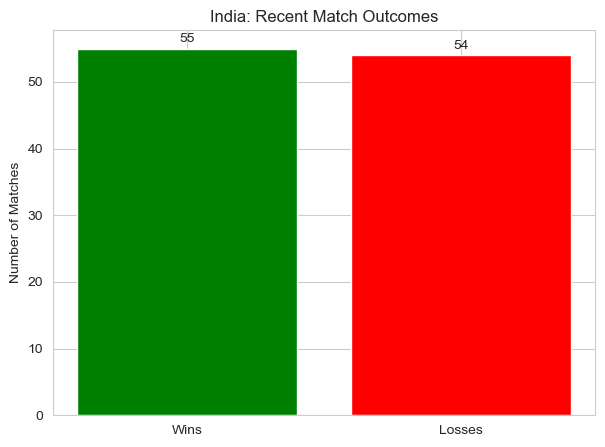

In [19]:
# Visualization of India's Recent Match Outcomes (Wins vs. Losses)

plt.figure(figsize=(7, 5))

# Data for plotting
outcomes = ['Wins', 'Losses']
counts = [india_win_count, india_loss_count]

plt.bar(outcomes, counts, color=['green', 'red'])
plt.title('India: Recent Match Outcomes')
plt.ylabel('Number of Matches')
for i, value in enumerate(counts):
    plt.text(i, value + 1, str(value), ha='center')

plt.show()

### 5. Visualization of India's ICC Ranking among Top 10 Teams

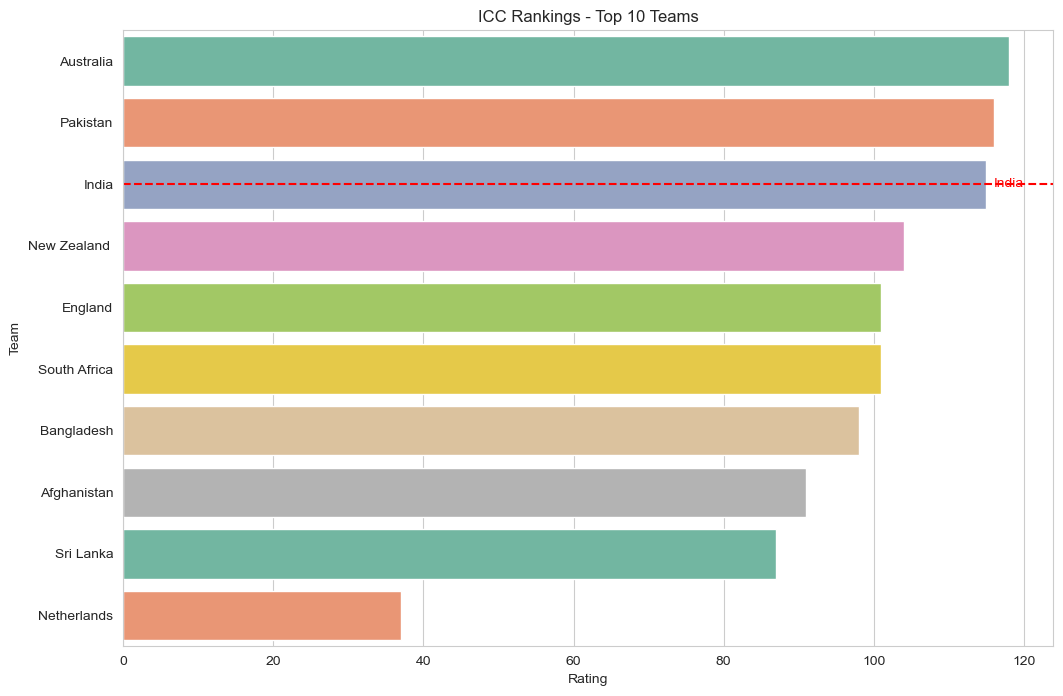

In [20]:
# Prepare the top_10_teams DataFrame by selecting the top 10 teams based on their ratings
top_10_teams = ranking.sort_values(by='Rating', ascending=False).head(10)

# Plot the ICC rankings of the top 10 teams
plt.figure(figsize=(12, 8))
sns.barplot(x='Rating', y='Team_name', data=top_10_teams, palette='Set2')
plt.title('ICC Rankings - Top 10 Teams')
plt.xlabel('Rating')
plt.ylabel('Team')

# Correctly annotate India's position in the rankings
india_position = top_10_teams.reset_index().query("Team_name == 'India'").index[0]
plt.axhline(y=india_position, color='red', linestyle='--')
plt.text(top_10_teams.loc[top_10_teams['Team_name'] == 'India', 'Rating'].iloc[0] + 1, india_position, 
         'India', verticalalignment='center', color='red')

plt.show()

### 6. Visualization of India's World Cup 2023 Fixtures

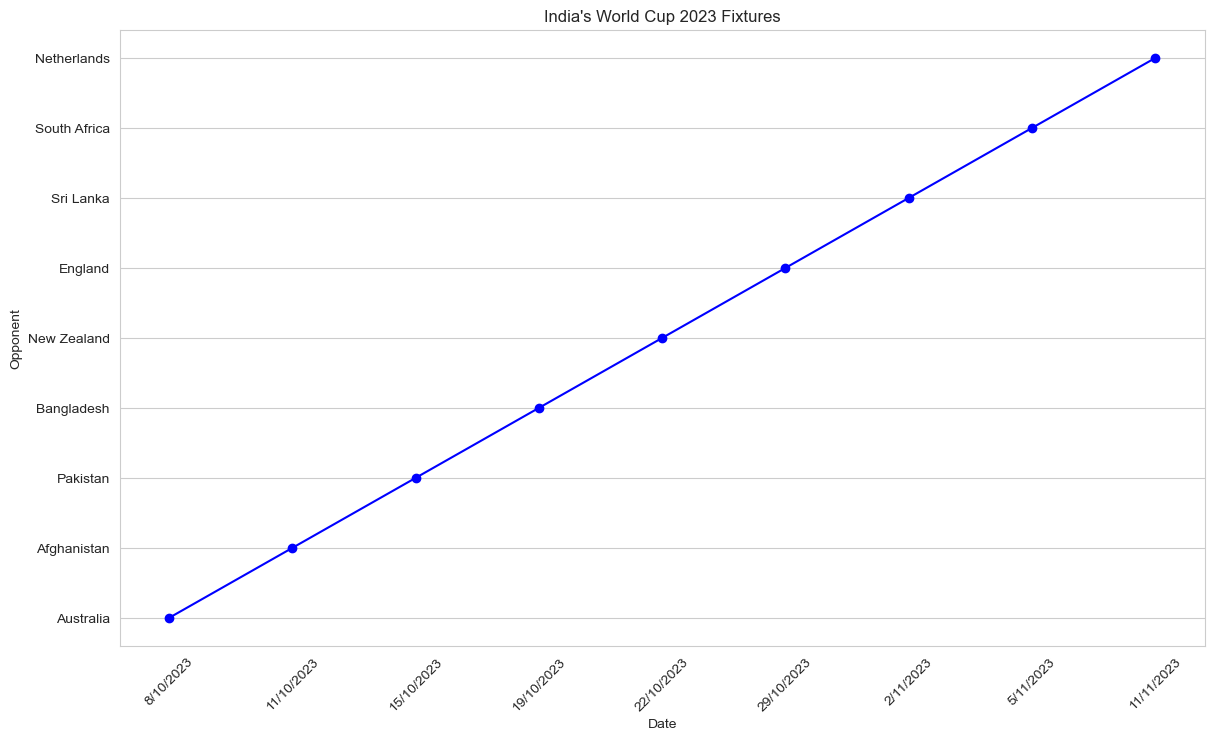

In [21]:
# Filter India's fixtures
india_fixtures = fixtures[(fixtures['Team_1'] == 'India') | (fixtures['Team_2'] == 'India')]

# Plot India's World Cup 2023 Fixtures
plt.figure(figsize=(14, 8))
plt.plot(india_fixtures['Date'], india_fixtures['Team_2'], marker='o', linestyle='-', color='blue')
plt.title('India\'s World Cup 2023 Fixtures')
plt.xlabel('Date')
plt.ylabel('Opponent')
plt.xticks(rotation=45)
plt.grid(axis='x')
plt.show()

### 7. Calculating win percentage against each team

In [22]:
# Filter results involving India
india_matches = results[(results['Team_1'] == 'India') | (results['Team_2'] == 'India')]

# Identify wins
india_wins = india_matches[india_matches['Winner'] == 'India']

# Count wins against each team
wins_against_teams = india_wins.groupby(['Team_1', 'Team_2']).size().reset_index(name='Wins')
wins_against_teams['Opponent'] = wins_against_teams.apply(lambda row: row['Team_2'] if row['Team_1'] == 'India' else row['Team_1'], axis=1)
wins_summary = wins_against_teams.groupby('Opponent').agg({'Wins': 'sum'}).reset_index().sort_values(by='Wins', ascending=False)

# Calculating win percentage against each team
total_matches_against_teams = india_matches.groupby(['Team_1', 'Team_2']).size().reset_index(name='Total Matches')
total_matches_against_teams['Opponent'] = total_matches_against_teams.apply(lambda row: row['Team_2'] if row['Team_1'] == 'India' else row['Team_1'], axis=1)
total_matches_summary = total_matches_against_teams.groupby('Opponent').agg({'Total Matches': 'sum'}).reset_index()
win_percentage_summary = pd.merge(wins_summary, total_matches_summary, on='Opponent')
win_percentage_summary['Win Percentage'] = (win_percentage_summary['Wins'] / win_percentage_summary['Total Matches']) * 100

india_wins

,Date,Team_1,Team_2,Winner,Margin,Ground
14,24/06/2015,Bangladesh,India,India,won by 77 runs,Shere Bangla National Stadium
16,10/07/2015,Zimbabwe,India,India,won by 4 runs,Harare Sports Club
19,12/07/2015,Zimbabwe,India,India,won by 62 runs,Harare Sports Club
20,14/07/2015,Zimbabwe,India,India,won by 83 runs,Harare Sports Club
73,23/01/2016,Australia,India,India,won by 6 wickets,Sydney Cricket Ground
87,11/06/2016,Zimbabwe,India,India,won by 9 wickets,Harare Sports Club
89,13/06/2016,Zimbabwe,India,India,won by 8 wickets,Harare Sports Club
91,15/06/2016,Zimbabwe,India,India,won by 10 wickets,Harare Sports Club
141,23/10/2016,India,New Zealand,India,won by 7 wickets,Punjab Cricket Association IS Bindra Stadium
288,01/02/2018,South Africa,India,India,won by 6 wickets,Kingsmead


In [23]:
wins_summary

,Opponent,Wins
13,West Indies,11
11,South Africa,5
12,Sri Lanka,5
15,Zimbabwe,5
1,Australia,4
4,Bangladesh,4
5,England,4
8,New Zealand,4
14,Zimbabwe,4
2,Australia,2


In [24]:
win_percentage_summary

,Opponent,Wins,Total Matches,Win Percentage
0,West Indies,11,15,73.333333
1,South Africa,5,6,83.333333
2,Sri Lanka,5,7,71.428571
3,Zimbabwe,5,5,100.000000
4,Australia,4,11,36.363636
5,Bangladesh,4,5,80.000000
6,England,4,8,50.000000
7,New Zealand,4,10,40.000000
8,Zimbabwe,4,4,100.000000
9,Australia,2,8,25.000000


### 8. Plotting Team India's wins against other teams

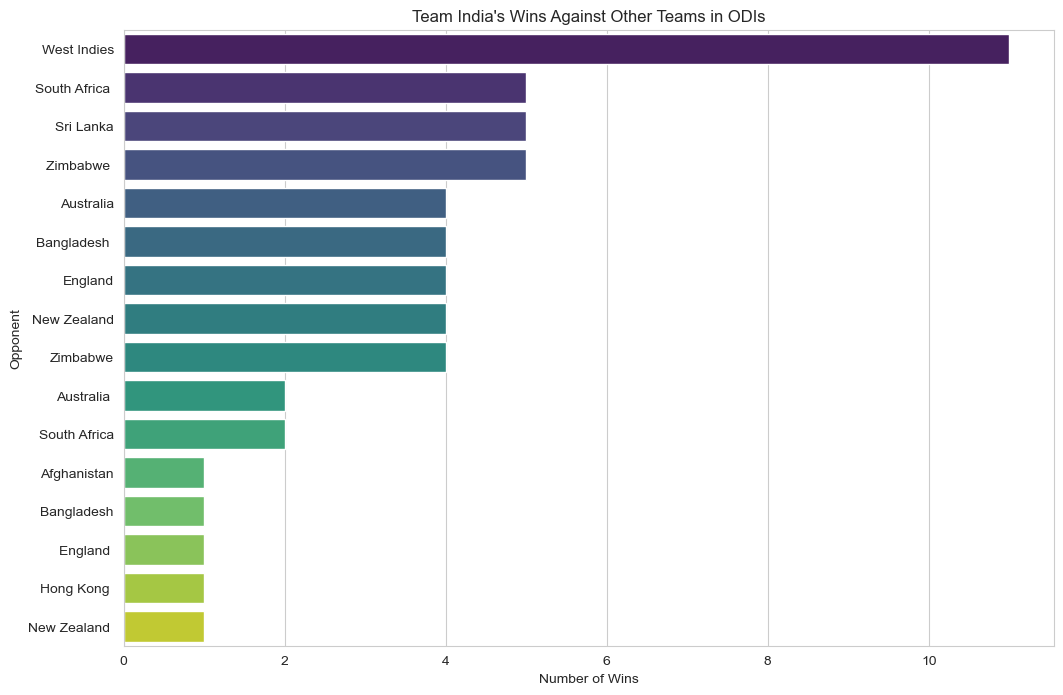

In [25]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Wins', y='Opponent', data=wins_summary, palette='viridis')
plt.title('Team India\'s Wins Against Other Teams in ODIs')
plt.xlabel('Number of Wins')
plt.ylabel('Opponent')
plt.show()

## 2. Australia's Overall Performance in World Cups:

### 1. Australia's Overall Performance in World Cups:

In [26]:
# Filter Australia's data from the World Cup 2023 dataset
australia_wc_data = World_cup[World_cup['Team_name'] == 'Australia']

# Displaying Australia's World Cup performance statistics
australia_wc_data

,Team_name,Team_ranking,Titles,Win_percentage_ODI,WC_matches,WC_match_won,Win_percent_WC,WC_match_loss,Loss_percent_WC,Tied,No_result,World_cup_winner,Recent_points,Rating
0,Australia,1,5,60.73,94,69,73.4,23,24.46,1,1,Yes,2714,118


### 2. Visualization of Australia's Win Percentage in World Cups vs. ODIs

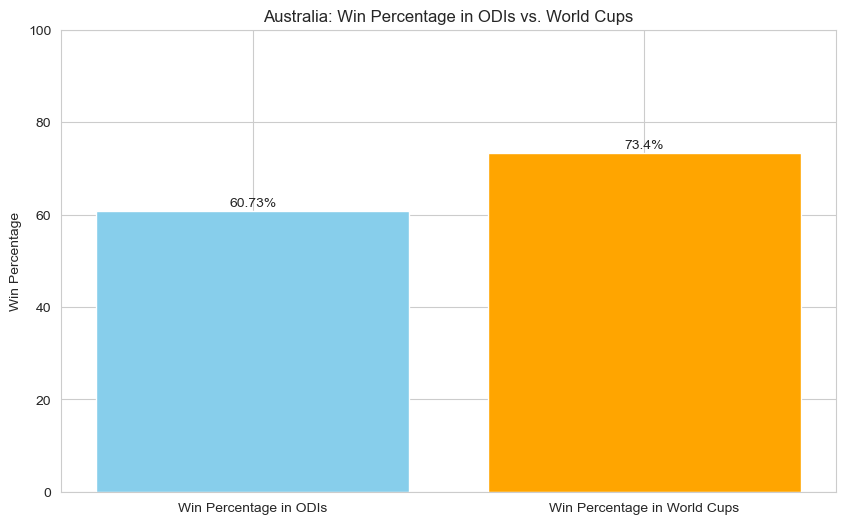

In [27]:
plt.figure(figsize=(10, 6))

# Data for plotting
categories = ['Win Percentage in ODIs', 'Win Percentage in World Cups']
percentages = [australia_wc_data['Win_percentage_ODI'].values[0], australia_wc_data['Win_percent_WC'].values[0]]

plt.bar(categories, percentages, color=['skyblue', 'orange'])
plt.title('Australia: Win Percentage in ODIs vs. World Cups')
plt.ylabel('Win Percentage')
plt.ylim(0, 100)
for i, value in enumerate(percentages):
    plt.text(i, value + 1, f"{value}%", ha='center')

plt.show()

### 3. Analyzing Australia's Recent Match Results

In [28]:
# Filter Australia's match results from the 'results' DataFrame
australia_results = results[(results['Team_1'] == 'Australia') | (results['Team_2'] == 'Australia')]

# Calculate wins and losses
australia_wins = australia_results[australia_results['Winner'] == 'Australia']
australia_losses = australia_results[(australia_results['Winner'] != 'Australia') & (australia_results['Winner'] != 'No result')]

# Counting wins and losses
australia_win_count = australia_wins.shape[0]
australia_loss_count = australia_losses.shape[0]

print(australia_win_count, australia_loss_count)

44 44


### 4. Visualization of Australia's Recent Match Outcomes

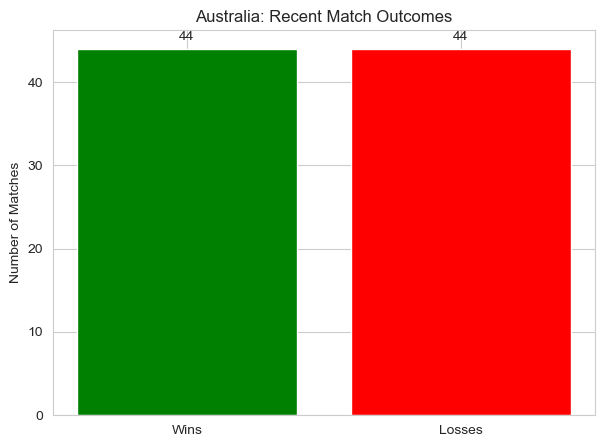

In [29]:
plt.figure(figsize=(7, 5))

# Data for plotting
outcomes = ['Wins', 'Losses']
counts = [australia_win_count, australia_loss_count]

plt.bar(outcomes, counts, color=['green', 'red'])
plt.title('Australia: Recent Match Outcomes')
plt.ylabel('Number of Matches')
for i, value in enumerate(counts):
    plt.text(i, value + 1, str(value), ha='center')

plt.show()

### 5. Visualization of Australia's ICC Ranking among Top 10 Teams

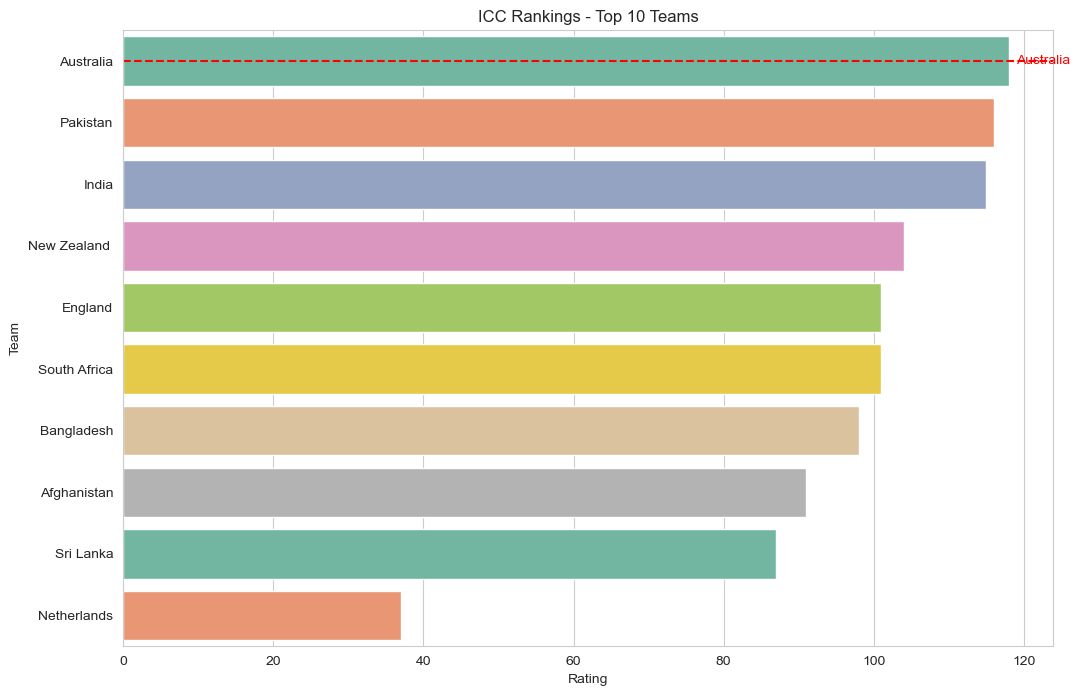

In [30]:
# Prepare the top_10_teams DataFrame by selecting the top 10 teams based on their ratings
top_10_teams = ranking.sort_values(by='Rating', ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Rating', y='Team_name', data=top_10_teams, palette='Set2')
plt.title('ICC Rankings - Top 10 Teams')
plt.xlabel('Rating')
plt.ylabel('Team')

australia_position = top_10_teams.reset_index().query("Team_name == 'Australia'").index[0]
plt.axhline(y=australia_position, color='red', linestyle='--')
plt.text(top_10_teams.loc[top_10_teams['Team_name'] == 'Australia', 'Rating'].iloc[0] + 1, australia_position, 
         'Australia', verticalalignment='center', color='red')

plt.show()

### 6. Visualization of Australia's World Cup 2023 Fixtures

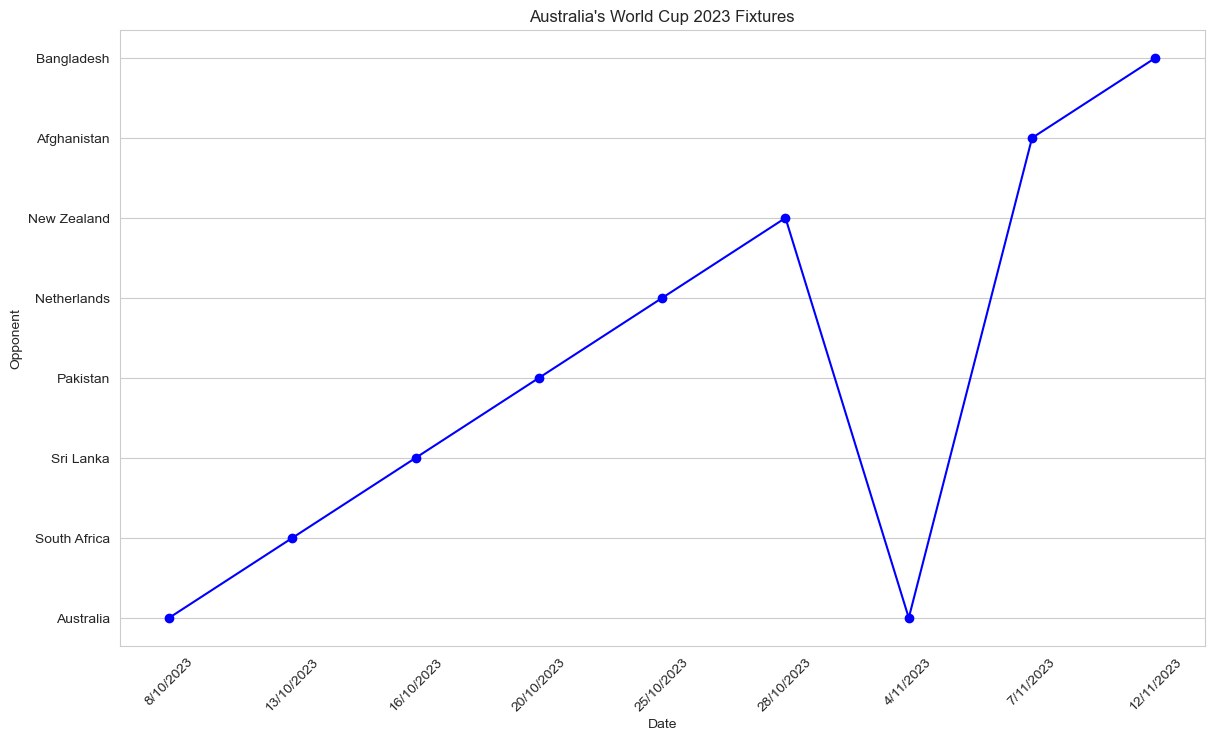

In [31]:
# Filter Australia's fixtures
australia_fixtures = fixtures[(fixtures['Team_1'] == 'Australia') | (fixtures['Team_2'] == 'Australia')]

plt.figure(figsize=(14, 8))
plt.plot(australia_fixtures['Date'], australia_fixtures['Team_2'], marker='o', linestyle='-', color='blue')
plt.title('Australia\'s World Cup 2023 Fixtures')
plt.xlabel('Date')
plt.ylabel('Opponent')
plt.xticks(rotation=45)
plt.grid(axis='x')
plt.show()

### 7. Calculating win percentage against each team for Australia

In [32]:
# Filter results involving Australia
australia_matches = results[(results['Team_1'] == 'Australia') | (results['Team_2'] == 'Australia')]

# Identify wins for Australia
australia_wins = australia_matches[australia_matches['Winner'] == 'Australia']

# Count wins against each team for Australia
wins_against_teams_au = australia_wins.groupby(['Team_1', 'Team_2']).size().reset_index(name='Wins')
wins_against_teams_au['Opponent'] = wins_against_teams_au.apply(lambda row: row['Team_2'] if row['Team_1'] == 'Australia' else row['Team_1'], axis=1)
wins_summary_au = wins_against_teams_au.groupby('Opponent').agg({'Wins': 'sum'}).reset_index().sort_values(by='Wins', ascending=False)

# Calculating win percentage against each team for Australia
total_matches_against_teams_au = australia_matches.groupby(['Team_1', 'Team_2']).size().reset_index(name='Total Matches')
total_matches_against_teams_au['Opponent'] = total_matches_against_teams_au.apply(lambda row: row['Team_2'] if row['Team_1'] == 'Australia' else row['Team_1'], axis=1)
total_matches_summary_au = total_matches_against_teams_au.groupby('Opponent').agg({'Total Matches': 'sum'}).reset_index()
win_percentage_summary_au = pd.merge(wins_summary_au, total_matches_summary_au, on='Opponent')
win_percentage_summary_au['Win Percentage'] = (win_percentage_summary_au['Wins'] / win_percentage_summary_au['Total Matches']) * 100

In [33]:
australia_wins

,Date,Team_1,Team_2,Winner,Margin,Ground
37,12/09/2015,England,Australia,Australia,won by 8 wickets,Old Trafford
79,06/02/2016,New Zealand,Australia,Australia,won by 4 wickets,Sky Stadium
85,05/06/2016,West Indies,Australia,Australia,won by 6 wickets,Providence Stadium
88,11/06/2016,Australia,South Africa,Australia,won by 36 runs,Warner Park
97,21/06/2016,West Indies,Australia,Australia,won by 6 wickets,Kensington Oval
101,26/06/2016,West Indies,Australia,Australia,won by 58 runs,Kensington Oval
113,21/08/2016,Sri Lanka,Australia,Australia,won by 3 wickets,R Premadasa Stadium
117,28/08/2016,Sri Lanka,Australia,Australia,won by 2 wickets,Rangiri Dambulla International Stadium
119,31/08/2016,Sri Lanka,Australia,Australia,won by 6 wickets,Rangiri Dambulla International Stadium
122,04/09/2016,Sri Lanka,Australia,Australia,won by 5 wickets,Pallekele International Cricket Stadium


In [34]:
wins_summary_au

,Opponent,Wins
2,England,6
4,India,4
6,New Zealand,4
9,Pakistan,4
12,Sri Lanka,4
5,India,3
8,Pakistan,3
14,West Indies,3
0,Pakistan,2
3,England,2


In [35]:
win_percentage_summary_au

,Opponent,Wins,Total Matches,Win Percentage
0,England,6,8,75.000000
1,India,4,11,36.363636
2,New Zealand,4,5,80.000000
3,Pakistan,4,4,100.000000
4,Sri Lanka,4,5,80.000000
5,India,3,6,50.000000
6,Pakistan,3,5,60.000000
7,West Indies,3,4,75.000000
8,Pakistan,2,2,100.000000
9,England,2,11,18.181818


### 8. Plotting Team Australia's wins against other teams

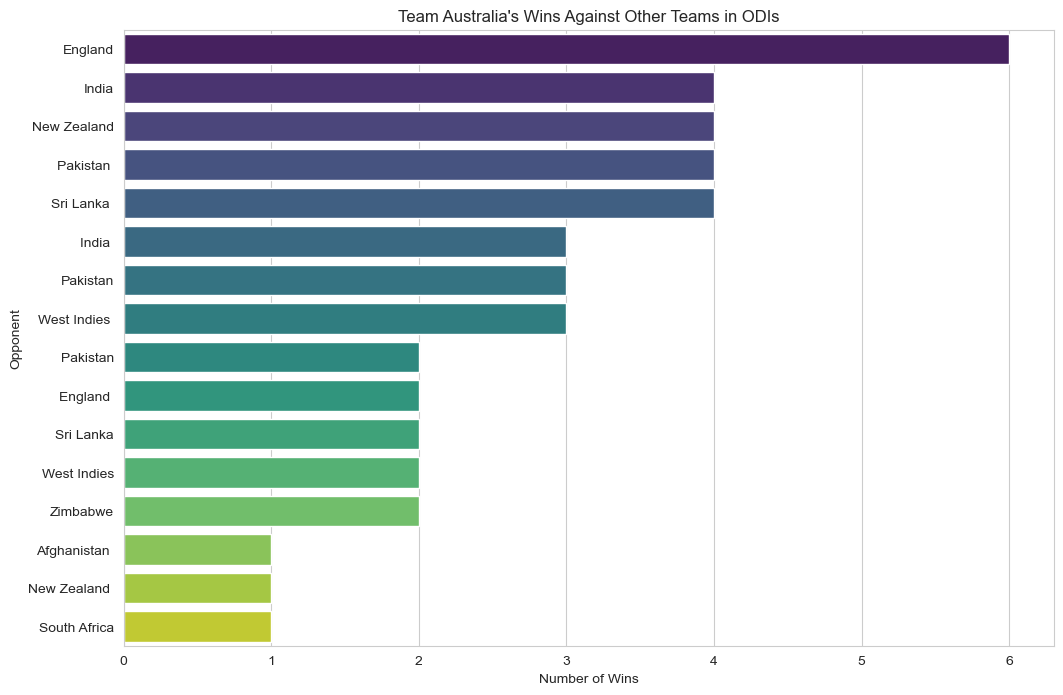

In [36]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Wins', y='Opponent', data=wins_summary_au, palette='viridis')
plt.title('Team Australia\'s Wins Against Other Teams in ODIs')
plt.xlabel('Number of Wins')
plt.ylabel('Opponent')
plt.show()

## 3. New Zealand's Overall Performance in World Cups:

### 1. New Zealand's Overall Performance in World Cups:

In [37]:
# Filter New Zealand's data from the World Cup 2023 dataset
nz_wc_data = World_cup[World_cup['Team_name'] == 'New Zealand ']

# Displaying New Zealand's World Cup performance statistics
nz_wc_data

,Team_name,Team_ranking,Titles,Win_percentage_ODI,WC_matches,WC_match_won,Win_percent_WC,WC_match_loss,Loss_percent_WC,Tied,No_result,World_cup_winner,Recent_points,Rating
3,New Zealand,4,0,45.89,89,54,60.67,33,37.07,1,1,No,2806,104


### 2. Visualization of New Zealand's Win Percentage in World Cups vs. ODIs

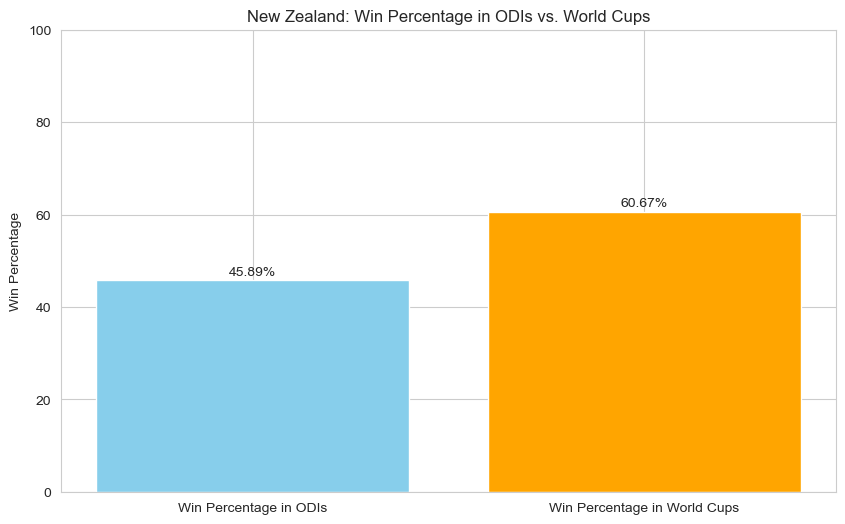

In [38]:
plt.figure(figsize=(10, 6))

categories = ['Win Percentage in ODIs', 'Win Percentage in World Cups']
percentages = [nz_wc_data['Win_percentage_ODI'].values[0], nz_wc_data['Win_percent_WC'].values[0]]

plt.bar(categories, percentages, color=['skyblue', 'orange'])
plt.title('New Zealand: Win Percentage in ODIs vs. World Cups')
plt.ylabel('Win Percentage')
plt.ylim(0, 100)
for i, value in enumerate(percentages):
    plt.text(i, value + 1, f"{value}%", ha='center')

plt.show()

### 3. Analyzing New Zealand's Recent Match Results

In [39]:
nz_results = results[(results['Team_1'] == 'New Zealand') | (results['Team_2'] == 'New Zealand')]

nz_wins = nz_results[nz_results['Winner'] == 'New Zealand']
nz_losses = nz_results[(nz_results['Winner'] != 'New Zealand') & (nz_results['Winner'] != 'No result')]

nz_win_count = nz_wins.shape[0]
nz_loss_count = nz_losses.shape[0]

print(nz_win_count, nz_loss_count)

36 46


### 4. Visualization of New Zealand's Recent Match Outcomes

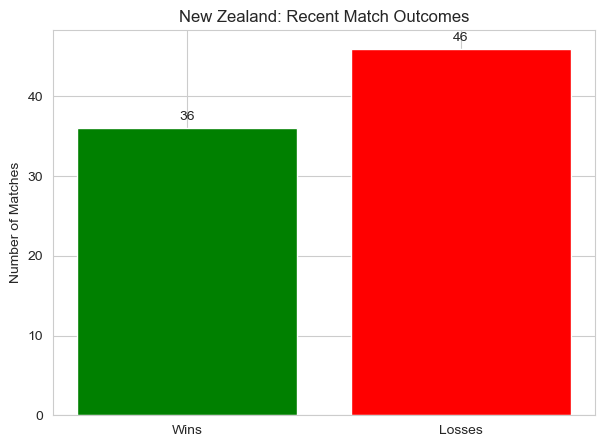

In [40]:
plt.figure(figsize=(7, 5))

outcomes = ['Wins', 'Losses']
counts = [nz_win_count, nz_loss_count]

plt.bar(outcomes, counts, color=['green', 'red'])
plt.title('New Zealand: Recent Match Outcomes')
plt.ylabel('Number of Matches')
for i, value in enumerate(counts):
    plt.text(i, value + 1, str(value), ha='center')

plt.show()

### 5. Visualization of New Zealand's ICC Ranking among Top 10 Teams

New Zealand is not in the top 10 teams based on the current dataset.


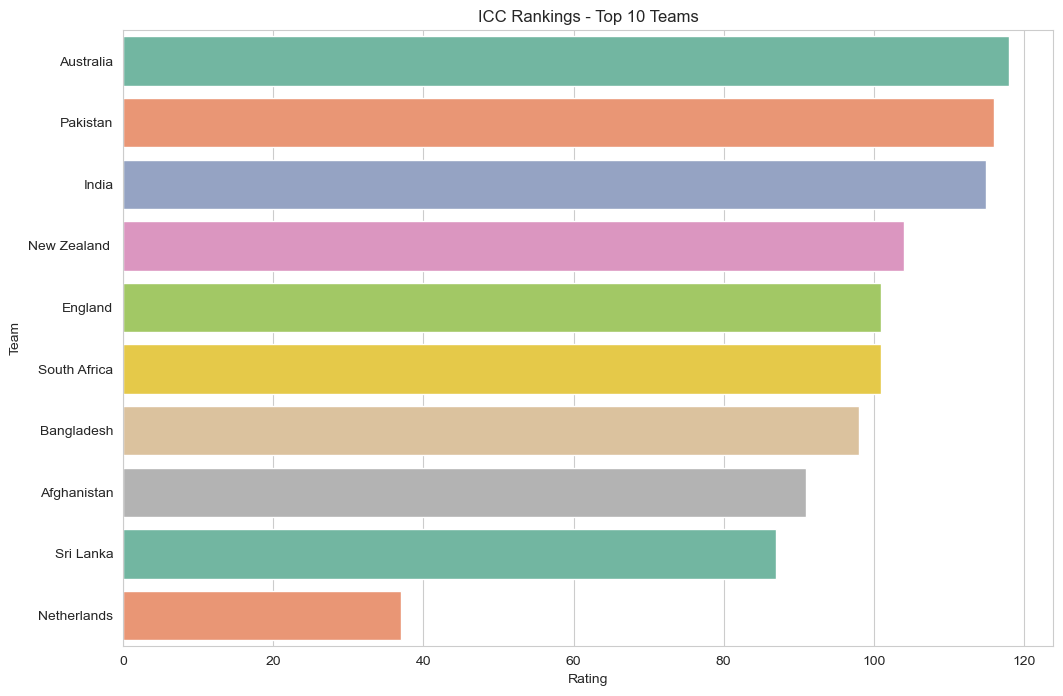

In [41]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Rating', y='Team_name', data=top_10_teams, palette='Set2')
plt.title('ICC Rankings - Top 10 Teams')
plt.xlabel('Rating')
plt.ylabel('Team')

# Use a conditional check to avoid IndexError
query_result = top_10_teams.reset_index().query("Team_name == 'New Zealand'")
if not query_result.empty:
    nz_position = query_result.index[0]
    plt.axhline(y=nz_position, color='red', linestyle='--')
    plt.text(top_10_teams.loc[top_10_teams['Team_name'] == 'New Zealand', 'Rating'].iloc[0] + 1, nz_position, 
             'New Zealand', verticalalignment='center', color='red')
else:
    print("New Zealand is not in the top 10 teams based on the current dataset.")

plt.show()

### 6. Visualization of New Zealand's World Cup 2023 Fixtures

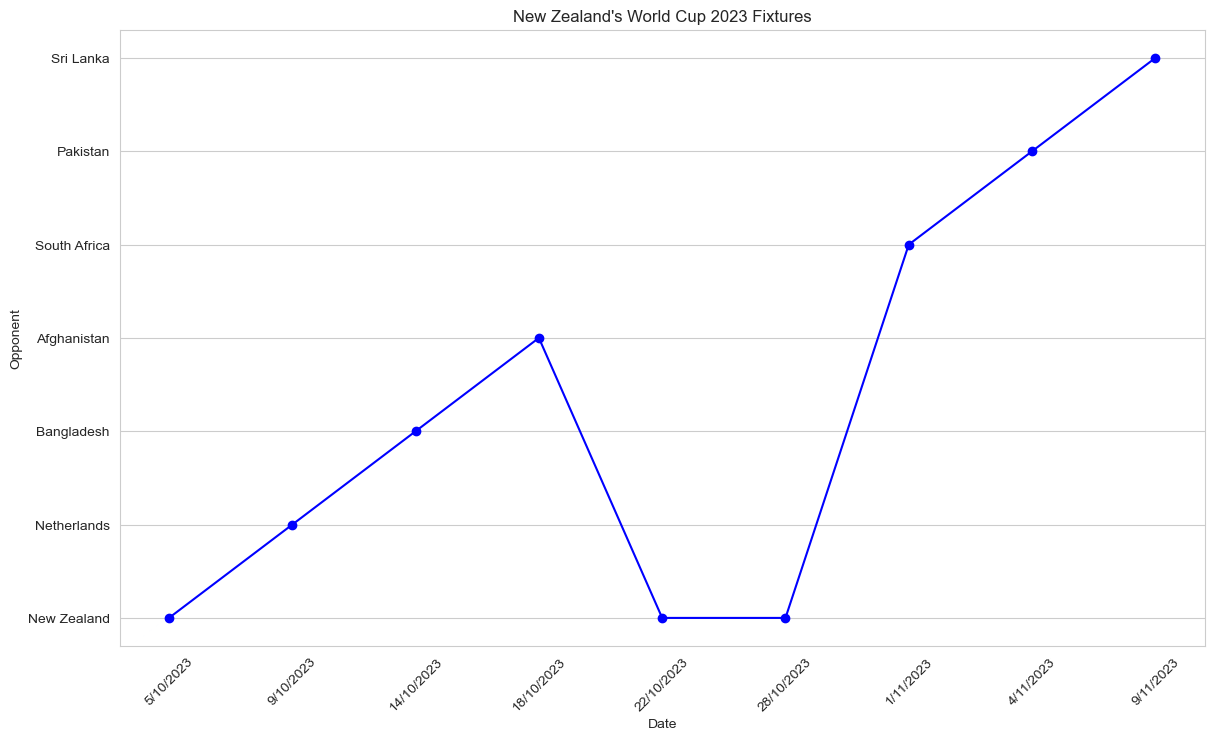

In [42]:
nz_fixtures = fixtures[(fixtures['Team_1'] == 'New Zealand') | (fixtures['Team_2'] == 'New Zealand')]

plt.figure(figsize=(14, 8))
plt.plot(nz_fixtures['Date'], nz_fixtures['Team_2'], marker='o', linestyle='-', color='blue')
plt.title('New Zealand\'s World Cup 2023 Fixtures')
plt.xlabel('Date')
plt.ylabel('Opponent')
plt.xticks(rotation=45)
plt.grid(axis='x')
plt.show()

### 7. Calculating win percentage against each team for New Zealand

In [43]:
# Filter results involving New Zealand
nz_matches = results[(results['Team_1'] == 'New Zealand') | (results['Team_2'] == 'New Zealand')]

# Identify wins
nz_wins = nz_matches[nz_matches['Winner'] == 'New Zealand']

# Count wins against each team
wins_against_teams_nz = nz_wins.groupby(['Team_1', 'Team_2']).size().reset_index(name='Wins')
wins_against_teams_nz['Opponent'] = wins_against_teams_nz.apply(lambda row: row['Team_2'] if row['Team_1'] == 'New Zealand' else row['Team_1'], axis=1)
wins_summary_nz = wins_against_teams_nz.groupby('Opponent').agg({'Wins': 'sum'}).reset_index().sort_values(by='Wins', ascending=False)

# Calculating win percentage against each team
total_matches_against_teams_nz = nz_matches.groupby(['Team_1', 'Team_2']).size().reset_index(name='Total Matches')
total_matches_against_teams_nz['Opponent'] = total_matches_against_teams_nz.apply(lambda row: row['Team_2'] if row['Team_1'] == 'New Zealand' else row['Team_1'], axis=1)
total_matches_summary_nz = total_matches_against_teams_nz.groupby('Opponent').agg({'Total Matches': 'sum'}).reset_index()
win_percentage_summary_nz = pd.merge(wins_summary_nz, total_matches_summary_nz, on='Opponent')
win_percentage_summary_nz['Win Percentage'] = (win_percentage_summary_nz['Wins'] / win_percentage_summary_nz['Total Matches']) * 100

In [44]:
nz_wins

,Date,Team_1,Team_2,Winner,Margin,Ground
27,04/08/2015,Zimbabwe,New Zealand,New Zealand,won by 10 wickets,Harare Sports Club
28,07/08/2015,Zimbabwe,New Zealand,New Zealand,won by 38 runs,Harare Sports Club
76,31/01/2016,New Zealand,Pakistan,New Zealand,won by 3 wickets,Eden Park
81,08/02/2016,New Zealand,Australia,New Zealand,won by 55 runs,Seddon Park
140,20/10/2016,India,New Zealand,New Zealand,won by 6 runs,Arun Jaitley Stadium
142,26/10/2016,India,New Zealand,New Zealand,won by 19 runs,JSCA International Stadium Complex
154,26/12/2016,New Zealand,Bangladesh,New Zealand,won by 77 runs,Hagley Oval
200,14/05/2017,Ireland,New Zealand,New Zealand,won by 51 runs,The Village
271,06/01/2018,New Zealand,Pakistan,New Zealand,won by 61 runs,Basin Reserve
365,07/11/2018,Pakistan,New Zealand,New Zealand,won by 47 runs,Sheikh Zayed Stadium


In [45]:
wins_summary_nz

,Opponent,Wins
2,Bangladesh,5
9,Pakistan,5
4,India,4
5,India,3
6,Ireland,3
8,Netherlands,3
12,Sri Lanka,3
13,West Indies,2
14,Zimbabwe,2
0,Afghanistan,1


In [46]:
win_percentage_summary_nz

,Opponent,Wins,Total Matches,Win Percentage
0,Bangladesh,5,6,83.333333
1,Pakistan,5,11,45.454545
2,India,4,10,40.000000
3,India,3,9,33.333333
4,Ireland,3,3,100.000000
5,Netherlands,3,3,100.000000
6,Sri Lanka,3,4,75.000000
7,West Indies,2,3,66.666667
8,Zimbabwe,2,3,66.666667
9,Afghanistan,1,1,100.000000


### 8. Plotting Team New Zealand's wins against other teams

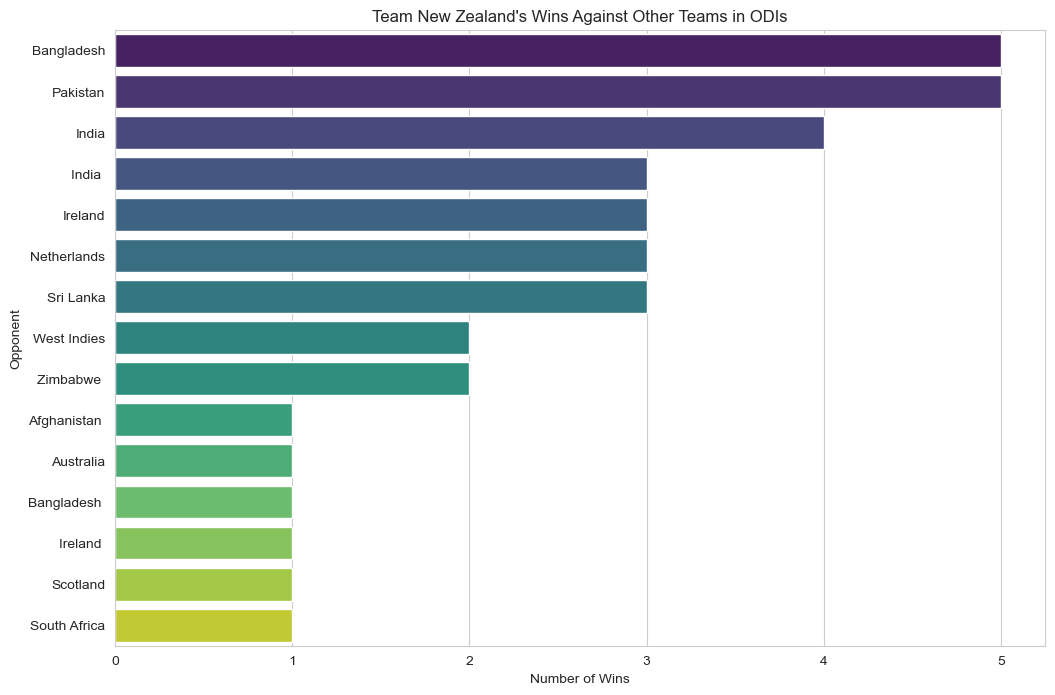

In [47]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Wins', y='Opponent', data=wins_summary_nz, palette='viridis')
plt.title('Team New Zealand\'s Wins Against Other Teams in ODIs')
plt.xlabel('Number of Wins')
plt.ylabel('Opponent')
plt.show()

## 4. Pakistan's Overall Performance in World Cups:

### 1. Pakistan's Overall Performance in World Cups:

In [48]:
# Filter Pakistan's data from the World Cup 2023 dataset
pakistan_wc_data = World_cup[World_cup['Team_name'] == 'Pakistan']

# Displaying Pakistan's World Cup performance statistics
pakistan_wc_data

,Team_name,Team_ranking,Titles,Win_percentage_ODI,WC_matches,WC_match_won,Win_percent_WC,WC_match_loss,Loss_percent_WC,Tied,No_result,World_cup_winner,Recent_points,Rating
1,Pakistan,2,1,52.78,79,45,56.96,32,40.5,0,2,Yes,2316,116


### 2. Visualization of Pakistan's Win Percentage in World Cups vs. ODIs

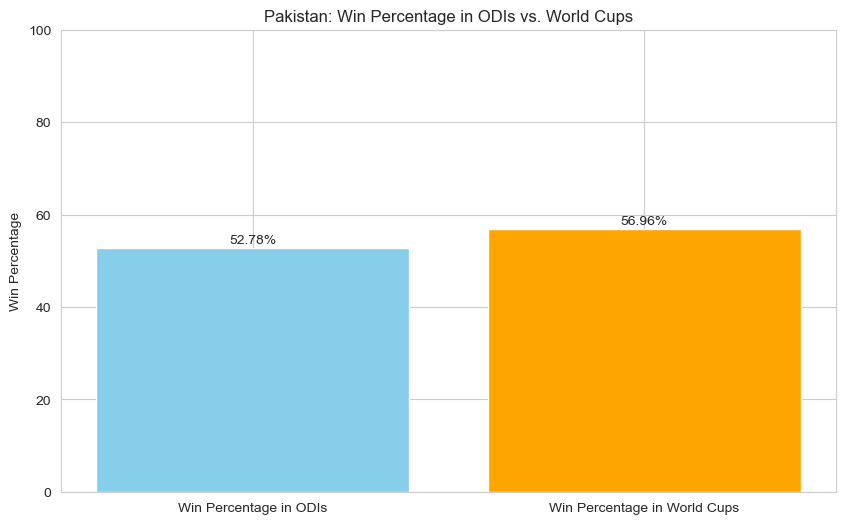

In [49]:
plt.figure(figsize=(10, 6))

categories = ['Win Percentage in ODIs', 'Win Percentage in World Cups']
percentages = [pakistan_wc_data['Win_percentage_ODI'].values[0], pakistan_wc_data['Win_percent_WC'].values[0]]

plt.bar(categories, percentages, color=['skyblue', 'orange'])
plt.title('Pakistan: Win Percentage in ODIs vs. World Cups')
plt.ylabel('Win Percentage')
plt.ylim(0, 100)
for i, value in enumerate(percentages):
    plt.text(i, value + 1, f"{value}%", ha='center')

plt.show()

### 3. Analyzing Pakistan's Recent Match Results

In [50]:
# Filter Pakistan's match results from the 'results' DataFrame
pakistan_results = results[(results['Team_1'] == 'Pakistan') | (results['Team_2'] == 'Pakistan')]

# Calculate wins and losses
pakistan_wins = pakistan_results[pakistan_results['Winner'] == 'Pakistan']
pakistan_losses = pakistan_results[(pakistan_results['Winner'] != 'Pakistan') & (pakistan_results['Winner'] != 'No result')]

# Counting wins and losses
pakistan_win_count = pakistan_wins.shape[0]
pakistan_loss_count = pakistan_losses.shape[0]

print(pakistan_win_count, pakistan_loss_count)

38 54


### 4. Visualization of Pakistan's Recent Match Outcomes

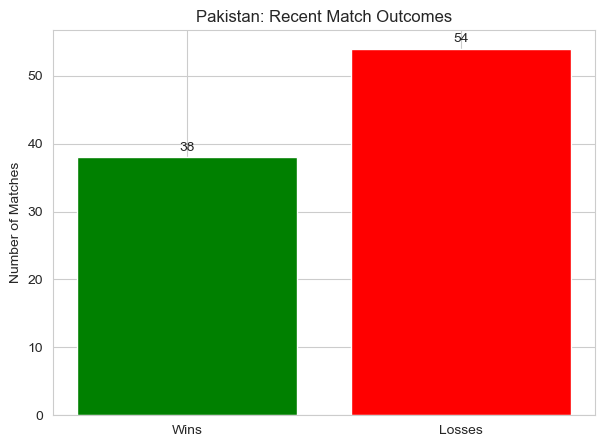

In [51]:
plt.figure(figsize=(7, 5))

outcomes = ['Wins', 'Losses']
counts = [pakistan_win_count, pakistan_loss_count]

plt.bar(outcomes, counts, color=['green', 'red'])
plt.title('Pakistan: Recent Match Outcomes')
plt.ylabel('Number of Matches')
for i, value in enumerate(counts):
    plt.text(i, value + 1, str(value), ha='center')

plt.show()

### # 5. Visualization of Pakistan's ICC Ranking among Top 10 Teams

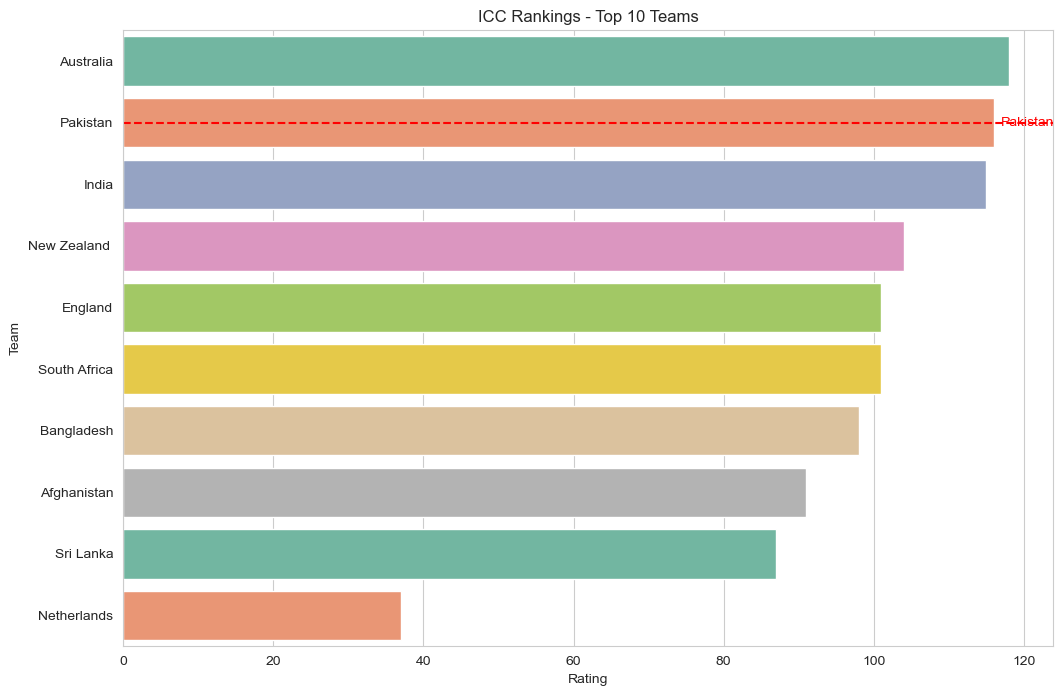

In [52]:
plt.figure(figsize=(12, 8))
top_10_teams = ranking.sort_values(by='Rating', ascending=False).head(10)
sns.barplot(x='Rating', y='Team_name', data=top_10_teams, palette='Set2')
plt.title('ICC Rankings - Top 10 Teams')
plt.xlabel('Rating')
plt.ylabel('Team')

# Annotating Pakistan's position
pakistan_position = top_10_teams.reset_index().query("Team_name == 'Pakistan'").index[0]
plt.axhline(y=pakistan_position, color='red', linestyle='--')
plt.text(top_10_teams.loc[top_10_teams['Team_name'] == 'Pakistan', 'Rating'].iloc[0] + 1, pakistan_position, 
         'Pakistan', verticalalignment='center', color='red')
plt.show()

### 6. Visualization of Pakistan's World Cup 2023 Fixtures

In [53]:
# Assuming 'fixtures' DataFrame is already loaded and filtered for Pakistan's matches
# We will adjust the code to include match locations in the visualization

# Concatenating opponent team and location
pakistan_fixtures['Match_Info'] = pakistan_fixtures.apply(lambda row: row['Team_2'] + " at " + row['Location'] if row['Team_1'] == 'Pakistan' else row['Team_1'] + " at " + row['Location'], axis=1)

plt.figure(figsize=(14, 8))

# Adjusting the plot to use 'Match_Info' for y-axis
plt.plot(pakistan_fixtures['Date'], pakistan_fixtures['Match_Info'], marker='o', linestyle='-', color='blue')

plt.title('Pakistan\'s World Cup 2023 Fixtures')
plt.xlabel('Date')
plt.ylabel('Match')
plt.xticks(rotation=45)
plt.grid(axis='x')

plt.tight_layout() # Adjust layout to make room for the rotated x-axis labels
plt.show()

NameError: name 'pakistan_fixtures' is not defined

### 7. Calculating win percentage against each team for Pakistan

In [54]:
pakistan_matches = results[(results['Team_1'] == 'Pakistan') | (results['Team_2'] == 'Pakistan')]
pakistan_wins = pakistan_matches[pakistan_matches['Winner'] == 'Pakistan']

wins_against_teams_pak = pakistan_wins.groupby(['Team_1', 'Team_2']).size().reset_index(name='Wins')
wins_against_teams_pak['Opponent'] = wins_against_teams_pak.apply(lambda row: row['Team_2'] if row['Team_1'] == 'Pakistan' else row['Team_1'], axis=1)
wins_summary_pak = wins_against_teams_pak.groupby('Opponent').agg({'Wins': 'sum'}).reset_index().sort_values(by='Wins', ascending=False)

total_matches_against_teams_pak = pakistan_matches.groupby(['Team_1', 'Team_2']).size().reset_index(name='Total Matches')
total_matches_against_teams_pak['Opponent'] = total_matches_against_teams_pak.apply(lambda row: row['Team_2'] if row['Team_1'] == 'Pakistan' else row['Team_1'], axis=1)
total_matches_summary_pak = total_matches_against_teams_pak.groupby('Opponent').agg({'Total Matches': 'sum'}).reset_index()
win_percentage_summary_pak = pd.merge(wins_summary_pak, total_matches_summary_pak, on='Opponent')
win_percentage_summary_pak['Win Percentage'] = (win_percentage_summary_pak['Wins'] / win_percentage_summary_pak['Total Matches']) * 100

In [55]:
pakistan_wins

,Date,Team_1,Team_2,Winner,Margin,Ground
17,11/07/2015,Sri Lanka,Pakistan,Pakistan,won by 6 wickets,Rangiri Dambulla International Stadium
23,19/07/2015,Sri Lanka,Pakistan,Pakistan,won by 135 runs,R Premadasa Stadium
24,22/07/2015,Sri Lanka,Pakistan,Pakistan,won by 7 wickets,R Premadasa Stadium
38,01/10/2015,Zimbabwe,Pakistan,Pakistan,won by 131 runs,Harare Sports Club
40,05/10/2015,Zimbabwe,Pakistan,Pakistan,won by 7 wickets,Harare Sports Club
111,18/08/2016,Ireland,Pakistan,Pakistan,won by 255 runs,The Village
121,04/09/2016,England,Pakistan,Pakistan,won by 4 wickets,Sophia Gardens
159,15/01/2017,Australia,Pakistan,Pakistan,won by 6 wickets,Melbourne Cricket Ground
315,13/07/2018,Zimbabwe,Pakistan,Pakistan,won by 201 runs,Queens Sports Club
317,16/07/2018,Zimbabwe,Pakistan,Pakistan,won by 9 wickets,Queens Sports Club


In [56]:
wins_summary_pak

,Opponent,Wins
15,Zimbabwe,7
7,New Zealand,5
6,Netherlands,3
12,Sri Lanka,3
13,West Indies,3
0,Afghanistan,2
1,Australia,2
3,England,2
9,South Africa,2
11,Sri Lanka,2


In [57]:
win_percentage_summary_pak 

,Opponent,Wins,Total Matches,Win Percentage
0,Zimbabwe,7,8,87.500000
1,New Zealand,5,11,45.454545
2,Netherlands,3,3,100.000000
3,Sri Lanka,3,5,60.000000
4,West Indies,3,4,75.000000
5,Afghanistan,2,2,100.000000
6,Australia,2,5,40.000000
7,England,2,10,20.000000
8,South Africa,2,4,50.000000
9,Sri Lanka,2,5,40.000000


### 8. Plotting Team Pakistan's wins against other teams

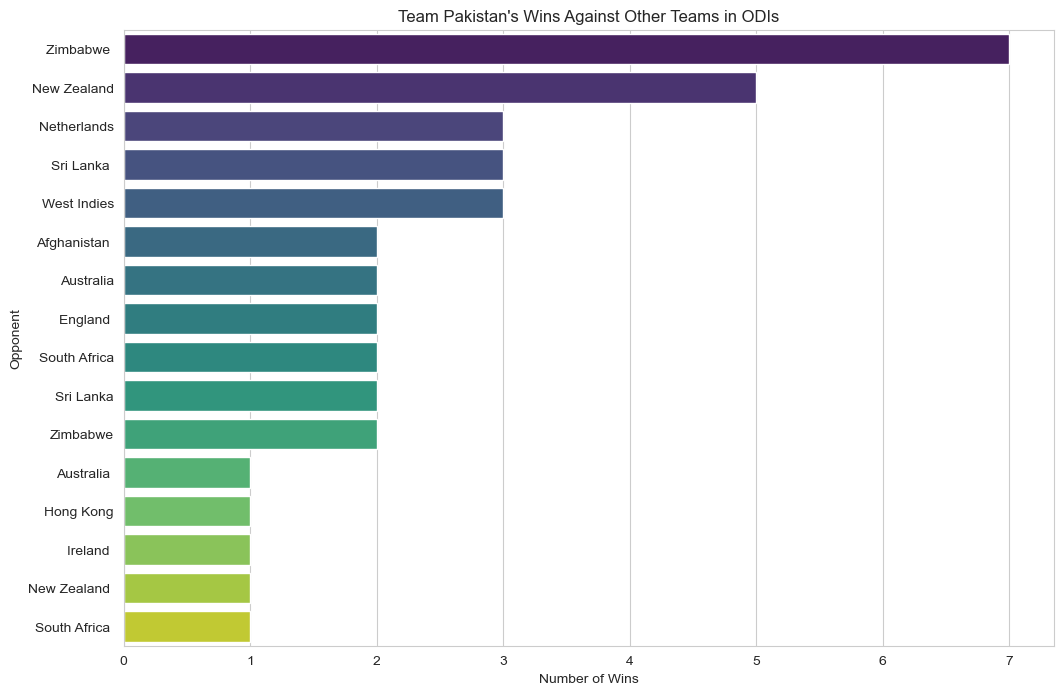

In [58]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Wins', y='Opponent', data=wins_summary_pak, palette='viridis')
plt.title('Team Pakistan\'s Wins Against Other Teams in ODIs')
plt.xlabel('Number of Wins')
plt.ylabel('Opponent')
plt.show()

## 5. England's Overall Performance in World Cups:

### 1. England's Overall Performance in World Cups:

In [59]:
# Filter England's data from the World Cup 2023 dataset
england_wc_data = World_cup[World_cup['Team_name'] == 'England']

# Displaying England's World Cup performance statistics
england_wc_data

,Team_name,Team_ranking,Titles,Win_percentage_ODI,WC_matches,WC_match_won,Win_percent_WC,WC_match_loss,Loss_percent_WC,Tied,No_result,World_cup_winner,Recent_points,Rating
4,England,5,1,50.32,83,48,57.83,32,38.55,2,1,Yes,2426,101


### 2. Visualization of England's Win Percentage in World Cups vs. ODIs

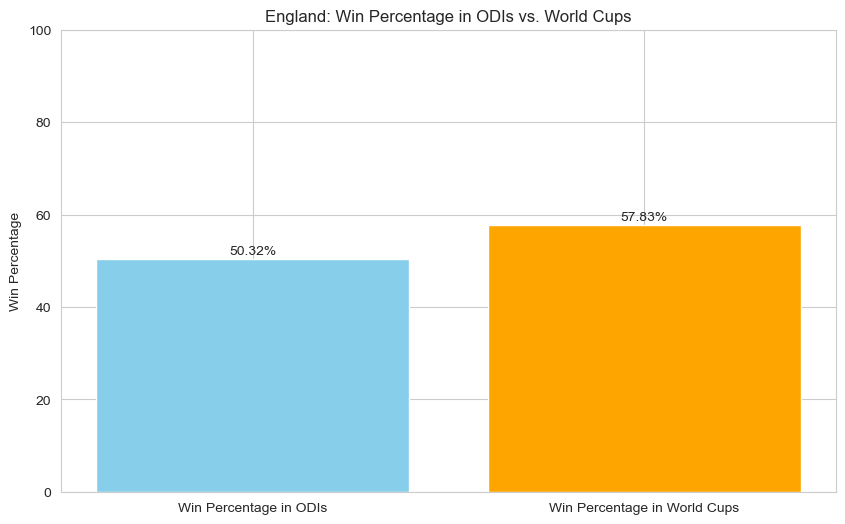

In [60]:
plt.figure(figsize=(10, 6))

categories = ['Win Percentage in ODIs', 'Win Percentage in World Cups']
percentages = [england_wc_data['Win_percentage_ODI'].values[0], england_wc_data['Win_percent_WC'].values[0]]

plt.bar(categories, percentages, color=['skyblue', 'orange'])
plt.title('England: Win Percentage in ODIs vs. World Cups')
plt.ylabel('Win Percentage')
plt.ylim(0, 100)
for i, value in enumerate(percentages):
    plt.text(i, value + 1, f"{value}%", ha='center')

plt.show()

### 3. Analyzing England's Recent Match Results

In [61]:
# Filter England's match results from the 'results' DataFrame
england_results = results[(results['Team_1'] == 'England') | (results['Team_2'] == 'England')]

# Calculate wins and losses
england_wins = england_results[england_results['Winner'] == 'England']
england_losses = england_results[(england_results['Winner'] != 'England') & (england_results['Winner'] != 'No result')]

# Counting wins and losses
england_win_count = england_wins.shape[0]
england_loss_count = england_losses.shape[0]

print(england_win_count, england_loss_count)

42 39


### 4. Visualization of England's Recent Match Outcomes

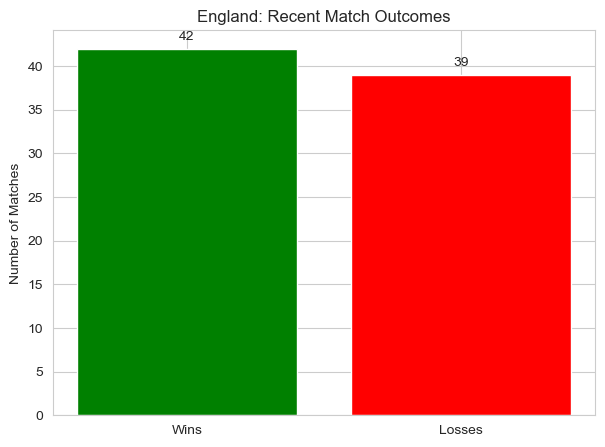

In [62]:
plt.figure(figsize=(7, 5))

outcomes = ['Wins', 'Losses']
counts = [england_win_count, england_loss_count]

plt.bar(outcomes, counts, color=['green', 'red'])
plt.title('England: Recent Match Outcomes')
plt.ylabel('Number of Matches')
for i, value in enumerate(counts):
    plt.text(i, value + 1, str(value), ha='center')

plt.show()

### 5. Visualization of England's ICC Ranking among Top 10 Teams

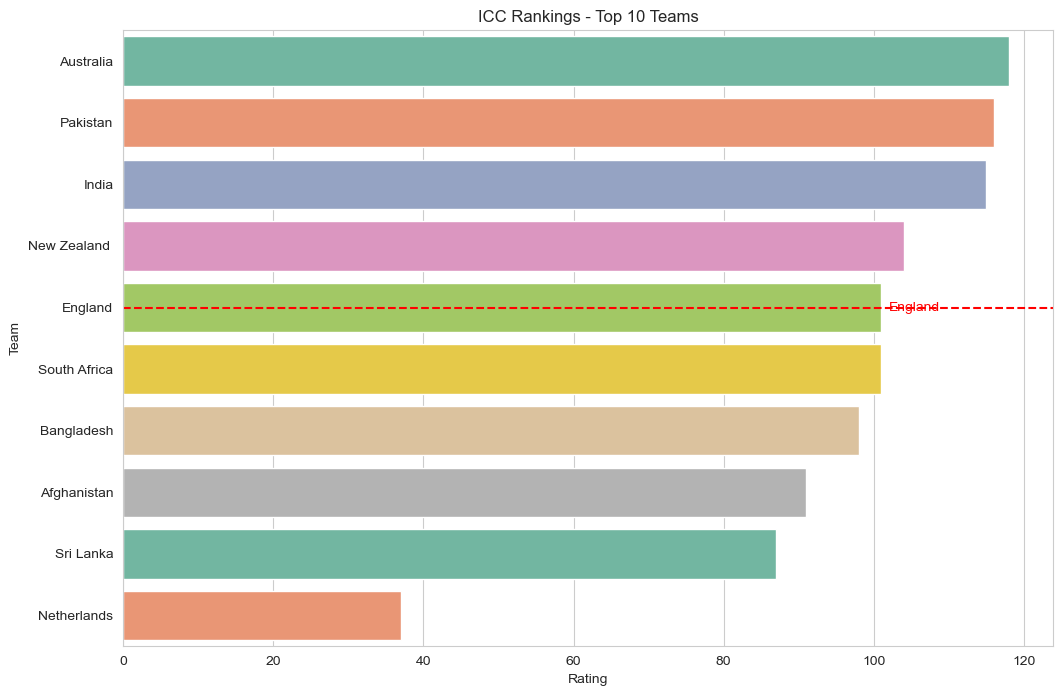

In [63]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Rating', y='Team_name', data=top_10_teams, palette='Set2')
plt.title('ICC Rankings - Top 10 Teams')
plt.xlabel('Rating')
plt.ylabel('Team')

england_position = top_10_teams.reset_index().query("Team_name == 'England'").index[0]
plt.axhline(y=england_position, color='red', linestyle='--')
plt.text(top_10_teams.loc[top_10_teams['Team_name'] == 'England', 'Rating'].iloc[0] + 1, england_position, 
         'England', verticalalignment='center', color='red')

plt.show()

### 6. Visualization of England's World Cup 2023 Fixtures

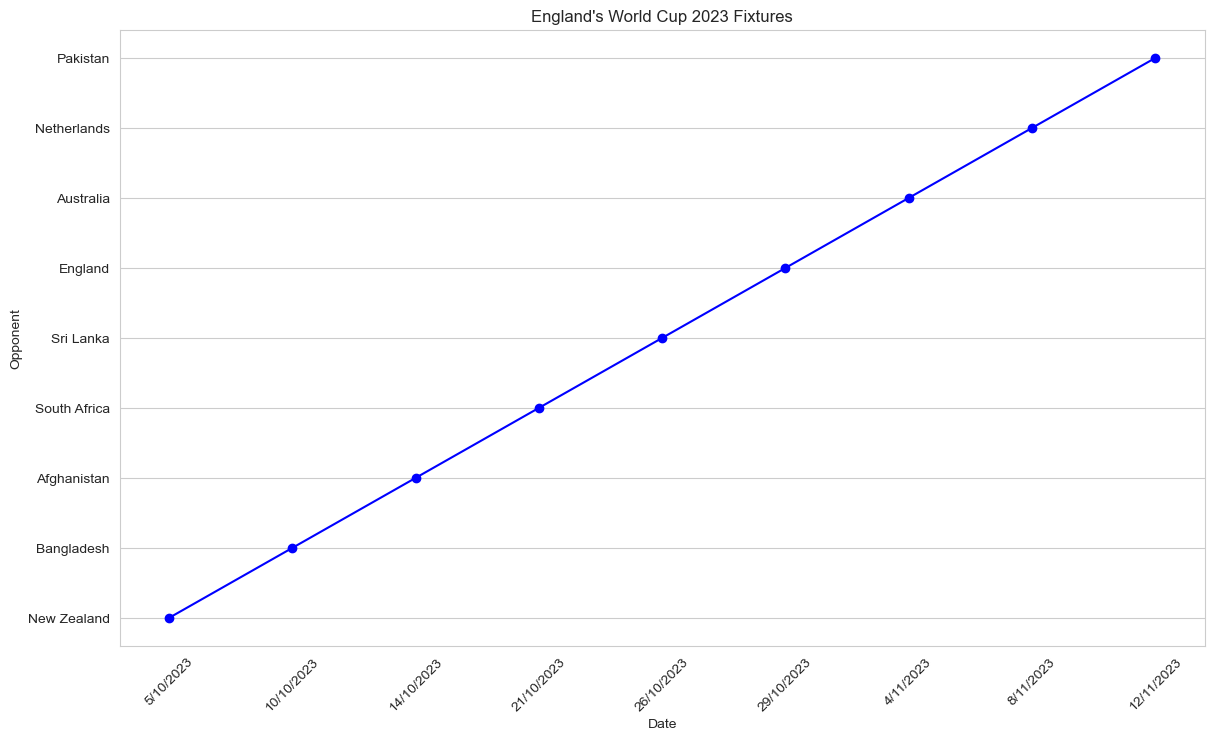

In [64]:
england_fixtures = fixtures[(fixtures['Team_1'] == 'England') | (fixtures['Team_2'] == 'England')]
plt.figure(figsize=(14, 8))
plt.plot(england_fixtures['Date'], england_fixtures['Team_2'], marker='o', linestyle='-', color='blue')
plt.title('England\'s World Cup 2023 Fixtures')
plt.xlabel('Date')
plt.ylabel('Opponent')
plt.xticks(rotation=45)
plt.grid(axis='x')
plt.show()

### # 7. Calculating win percentage against each team for England

In [65]:
england_matches = results[(results['Team_1'] == 'England') | (results['Team_2'] == 'England')]
england_wins = england_matches[england_matches['Winner'] == 'England']

wins_against_teams_eng = england_wins.groupby(['Team_1', 'Team_2']).size().reset_index(name='Wins')
wins_against_teams_eng['Opponent'] = wins_against_teams_eng.apply(lambda row: row['Team_2'] if row['Team_1'] == 'England' else row['Team_1'], axis=1)
wins_summary_eng = wins_against_teams_eng.groupby('Opponent').agg({'Wins': 'sum'}).reset_index().sort_values(by='Wins', ascending=False)

total_matches_against_teams_eng = england_matches.groupby(['Team_1', 'Team_2']).size().reset_index(name='Total Matches')
total_matches_against_teams_eng['Opponent'] = total_matches_against_teams_eng.apply(lambda row: row['Team_2'] if row['Team_1'] == 'England' else row['Team_1'], axis=1)
total_matches_summary_eng = total_matches_against_teams_eng.groupby('Opponent').agg({'Total Matches': 'sum'}).reset_index()
win_percentage_summary_eng = pd.merge(wins_summary_eng, total_matches_summary_eng, on='Opponent')
win_percentage_summary_eng['Win Percentage'] = (win_percentage_summary_eng['Wins'] / win_percentage_summary_eng['Total Matches']) * 100

In [66]:
england_wins

,Date,Team_1,Team_2,Winner,Margin,Ground
35,08/09/2015,England,Australia,England,won by 93 runs,Old Trafford
59,20/11/2015,Pakistan,England,England,England won by 84 runs,Dubai International Cricket Stadium
78,03/02/2016,South Africa,England,England,won by 39 runs,Mangaung Oval
80,06/02/2016,South Africa,England,England,won by 5 wickets,St George's Park
134,07/10/2016,Bangladesh,England,England,won by 21 runs,Shere Bangla National Stadium
137,12/10/2016,Bangladesh,England,England,won by 4 wickets,Zahur Ahmed Chowdhury Stadium
185,09/03/2017,West Indies,England,England,won by 186 runs,Kensington Oval
274,14/01/2018,Australia,England,England,won by 5 wickets,Melbourne Cricket Ground
278,18/01/2018,Australia,England,England,won by 4 wickets,Brisbane Cricket Ground
281,21/01/2018,Australia,England,England,won by 16 runs,Sydney Cricket Ground


In [67]:
wins_summary_eng

,Opponent,Wins
10,Pakistan,6
1,Australia,4
8,New Zealand,3
13,Sri Lanka,3
4,India,3
11,South Africa,3
7,Netherlands,3
14,Sri Lanka,2
12,South Africa,2
0,Australia,2


In [68]:
win_percentage_summary_eng

,Opponent,Wins,Total Matches,Win Percentage
0,Pakistan,6,6,100.000000
1,Australia,4,4,100.000000
2,New Zealand,3,4,75.000000
3,Sri Lanka,3,5,60.000000
4,India,3,8,37.500000
5,South Africa,3,9,33.333333
6,Netherlands,3,3,100.000000
7,Sri Lanka,2,4,50.000000
8,South Africa,2,5,40.000000
9,Australia,2,8,25.000000


### # 8. Plotting Team England's wins against other teams

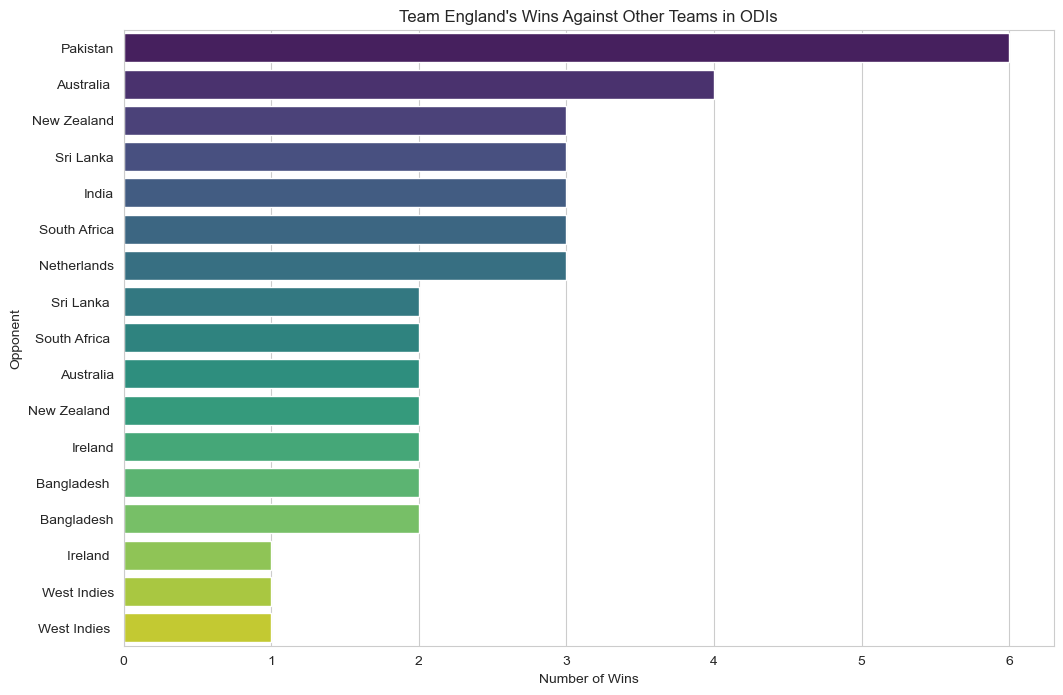

In [69]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Wins', y='Opponent', data=wins_summary_eng, palette='viridis')
plt.title('Team England\'s Wins Against Other Teams in ODIs')
plt.xlabel('Number of Wins')
plt.ylabel('Opponent')
plt.show()

## 6. South Africa's Overall Performance in World Cups:

### 1. South Africa's Overall Performance in World Cups:

In [70]:
# Filter South Africa's data from the World Cup 2023 dataset
south_africa_wc_data = World_cup[World_cup['Team_name'] == 'South Africa']

# Displaying South Africa's World Cup performance statistics
south_africa_wc_data

,Team_name,Team_ranking,Titles,Win_percentage_ODI,WC_matches,WC_match_won,Win_percent_WC,WC_match_loss,Loss_percent_WC,Tied,No_result,World_cup_winner,Recent_points,Rating
5,South Africa,6,0,61.0,64,38,59.37,23,35.93,2,1,No,1910,101


### 2. Visualization of South Africa's Win Percentage in World Cups vs. ODIs

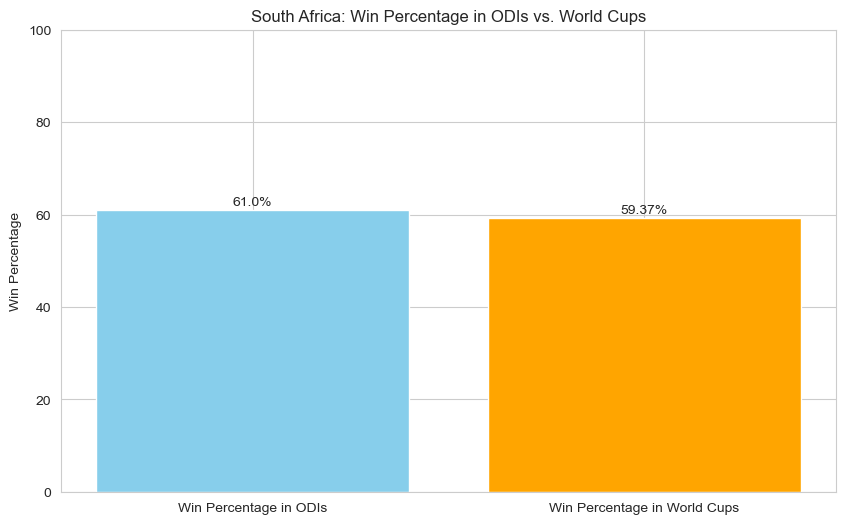

In [71]:
plt.figure(figsize=(10, 6))

categories = ['Win Percentage in ODIs', 'Win Percentage in World Cups']
percentages = [south_africa_wc_data['Win_percentage_ODI'].values[0], south_africa_wc_data['Win_percent_WC'].values[0]]

plt.bar(categories, percentages, color=['skyblue', 'orange'])
plt.title('South Africa: Win Percentage in ODIs vs. World Cups')
plt.ylabel('Win Percentage')
plt.ylim(0, 100)
for i, value in enumerate(percentages):
    plt.text(i, value + 1, f"{value}%", ha='center')

plt.show()

### 3. Analyzing South Africa's Recent Match Results

In [72]:
# Filter South Africa's match results from the 'results' DataFrame
south_africa_results = results[(results['Team_1'] == 'South Africa') | (results['Team_2'] == 'South Africa')]

# Calculate wins and losses
south_africa_wins = south_africa_results[south_africa_results['Winner'] == 'South Africa']
south_africa_losses = south_africa_results[(south_africa_results['Winner'] != 'South Africa') & (south_africa_results['Winner'] != 'No result')]

# Counting wins and losses
south_africa_win_count = south_africa_wins.shape[0]
south_africa_loss_count = south_africa_losses.shape[0]

print(south_africa_win_count, south_africa_loss_count)

33 45


### 4. Visualization of South Africa's Recent Match Outcomes

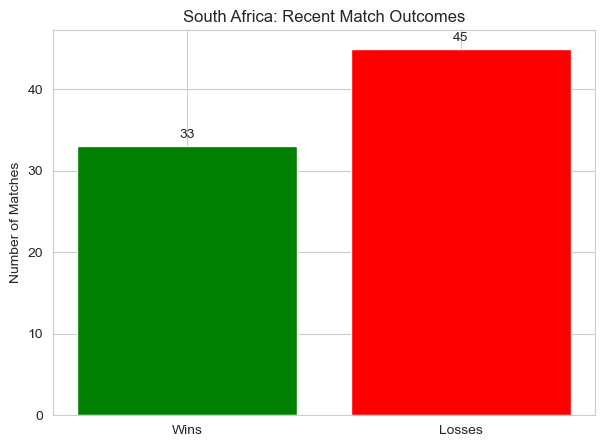

In [73]:
plt.figure(figsize=(7, 5))

outcomes = ['Wins', 'Losses']
counts = [south_africa_win_count, south_africa_loss_count]

plt.bar(outcomes, counts, color=['green', 'red'])
plt.title('South Africa: Recent Match Outcomes')
plt.ylabel('Number of Matches')
for i, value in enumerate(counts):
    plt.text(i, value + 1, str(value), ha='center')

plt.show()

### 5. Visualization of South Africa's ICC Ranking among Top 10 Teams

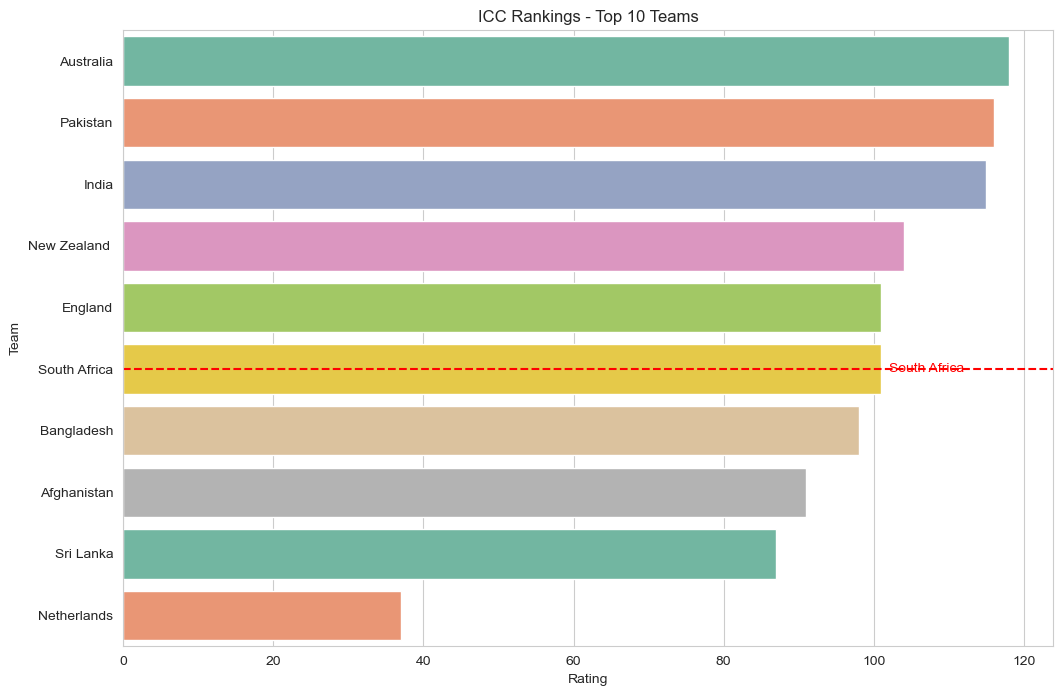

In [74]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Rating', y='Team_name', data=top_10_teams, palette='Set2')
plt.title('ICC Rankings - Top 10 Teams')
plt.xlabel('Rating')
plt.ylabel('Team')

south_africa_position = top_10_teams.reset_index().query("Team_name == 'South Africa'").index[0]
plt.axhline(y=south_africa_position, color='red', linestyle='--')
plt.text(top_10_teams.loc[top_10_teams['Team_name'] == 'South Africa', 'Rating'].iloc[0] + 1, south_africa_position, 
         'South Africa', verticalalignment='center', color='red')

plt.show()

### 6. Visualization of South Africa's World Cup 2023 Fixtures

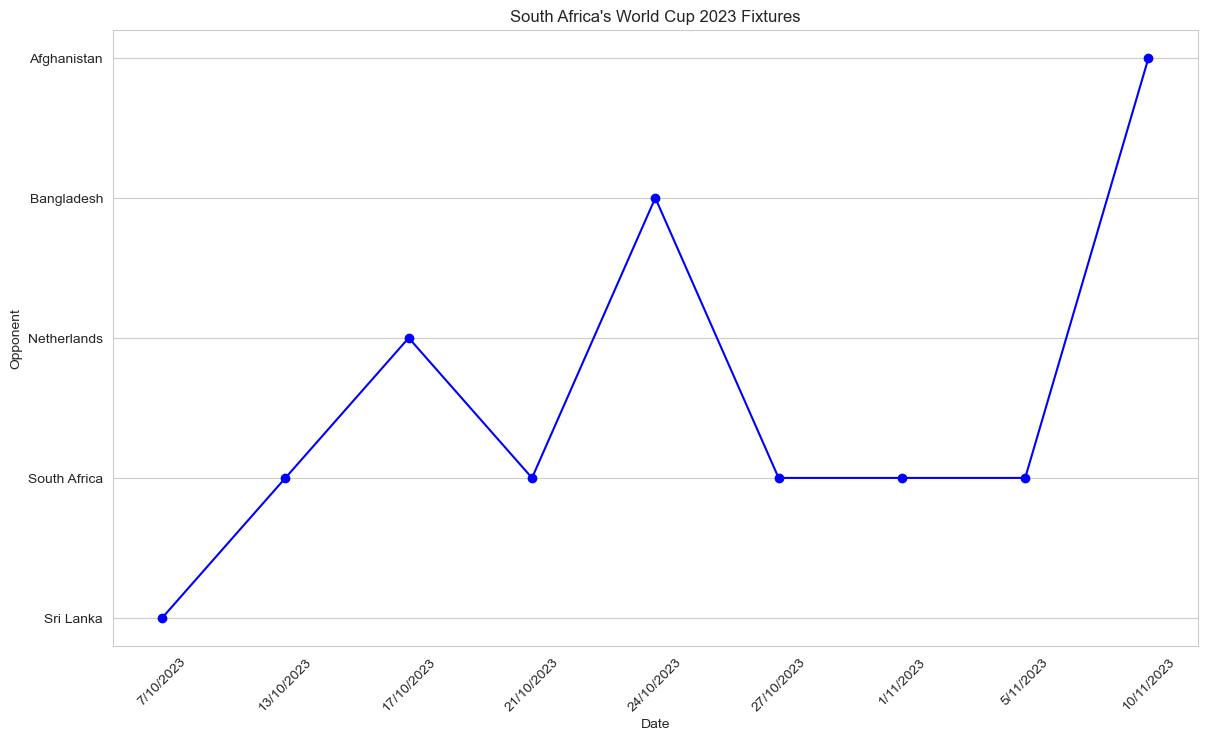

In [75]:
south_africa_fixtures = fixtures[(fixtures['Team_1'] == 'South Africa') | (fixtures['Team_2'] == 'South Africa')]
plt.figure(figsize=(14, 8))
plt.plot(south_africa_fixtures['Date'], south_africa_fixtures['Team_2'], marker='o', linestyle='-', color='blue')
plt.title("South Africa's World Cup 2023 Fixtures")
plt.xlabel('Date')
plt.ylabel('Opponent')
plt.xticks(rotation=45)
plt.grid(axis='x')
plt.show()

### 7. Calculating win percentage against each team for South Africa

In [76]:
south_africa_matches = results[(results['Team_1'] == 'South Africa') | (results['Team_2'] == 'South Africa')]
south_africa_wins = south_africa_matches[south_africa_matches['Winner'] == 'South Africa']

wins_against_teams_sa = south_africa_wins.groupby(['Team_1', 'Team_2']).size().reset_index(name='Wins')
wins_against_teams_sa['Opponent'] = wins_against_teams_sa.apply(lambda row: row['Team_2'] if row['Team_1'] == 'South Africa' else row['Team_1'], axis=1)
wins_summary_sa = wins_against_teams_sa.groupby('Opponent').agg({'Wins': 'sum'}).reset_index().sort_values(by='Wins', ascending=False)

total_matches_against_teams_sa = south_africa_matches.groupby(['Team_1', 'Team_2']).size().reset_index(name='Total Matches')
total_matches_against_teams_sa['Opponent'] = total_matches_against_teams_sa.apply(lambda row: row['Team_2'] if row['Team_1'] == 'South Africa' else row['Team_1'], axis=1)
total_matches_summary_sa = total_matches_against_teams_sa.groupby('Opponent').agg({'Total Matches': 'sum'}).reset_index()
win_percentage_summary_sa = pd.merge(wins_summary_sa, total_matches_summary_sa, on='Opponent')
win_percentage_summary_sa['Win Percentage'] = (win_percentage_summary_sa['Wins'] / win_percentage_summary_sa['Total Matches']) * 100

In [77]:
south_africa_wins

,Date,Team_1,Team_2,Winner,Margin,Ground
15,10/07/2015,Bangladesh,South Africa,South Africa,won by 8 wickets,Shere Bangla National Stadium
29,19/08/2015,South Africa,New Zealand,South Africa,won by 20 runs,SuperSport Park
44,18/10/2015,India,South Africa,South Africa,South Africa won by 18 runs,Saurashtra Cricket Association Stadium
49,25/10/2015,India,South Africa,South Africa,South Africa won by 214 runs,Wankhede Stadium
86,07/06/2016,Australia,South Africa,South Africa,won by 47 runs,Providence Stadium
92,15/06/2016,West Indies,South Africa,South Africa,won by 139 runs,Warner Park
171,07/02/2017,South Africa,Sri Lanka,South Africa,won by 40 runs,Newlands
325,29/07/2018,Sri Lanka,South Africa,South Africa,won by 5 wickets,Rangiri Dambulla International Stadium
327,01/08/2018,Sri Lanka,South Africa,South Africa,won by 4 wickets,Rangiri Dambulla International Stadium
329,05/08/2018,Sri Lanka,South Africa,South Africa,won by 78 runs,Pallekele International Cricket Stadium


In [78]:
wins_summary_sa

,Opponent,Wins
2,Australia,4
6,England,4
7,India,4
3,Australia,3
17,Zimbabwe,2
8,India,2
14,Sri Lanka,2
13,Sri Lanka,2
12,Pakistan,1
16,West Indies,1


In [79]:
win_percentage_summary_sa

,Opponent,Wins,Total Matches,Win Percentage
0,Australia,4,5,80.000000
1,England,4,9,44.444444
2,India,4,9,44.444444
3,Australia,3,5,60.000000
4,Zimbabwe,2,2,100.000000
5,India,2,6,33.333333
6,Sri Lanka,2,4,50.000000
7,Sri Lanka,2,7,28.571429
8,Pakistan,1,4,25.000000
9,West Indies,1,2,50.000000


### 8. Plotting Team South Africa's wins against other teams

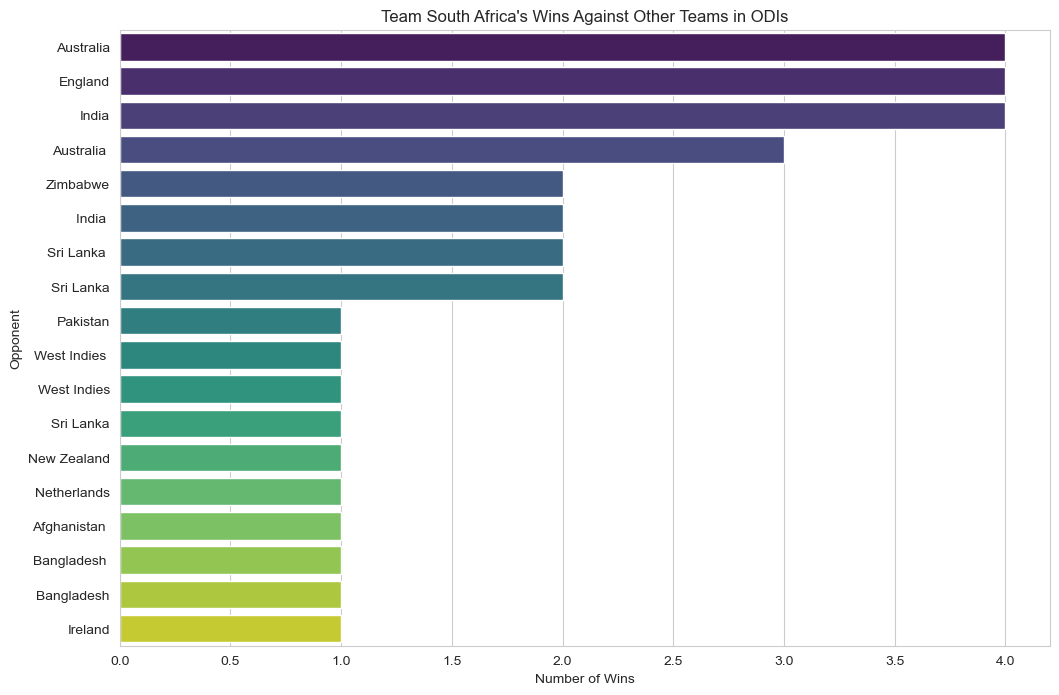

In [80]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Wins', y='Opponent', data=wins_summary_sa, palette='viridis')
plt.title("Team South Africa's Wins Against Other Teams in ODIs")
plt.xlabel('Number of Wins')
plt.ylabel('Opponent')
plt.show()

## 7. Sri Lanka's Overall Performance in World Cups:

### 1. Sri Lanka's Overall Performance in World Cups:

In [81]:
# Filter Sri Lanka's data from the World Cup 2023 dataset
sri_lanka_wc_data = World_cup[World_cup['Team_name'] == 'Sri Lanka']

# Displaying Sri Lanka's World Cup performance statistics
sri_lanka_wc_data

,Team_name,Team_ranking,Titles,Win_percentage_ODI,WC_matches,WC_match_won,Win_percent_WC,WC_match_loss,Loss_percent_WC,Tied,No_result,World_cup_winner,Recent_points,Rating
8,Sri Lanka,9,1,45.74,80,38,47.5,39,48.75,1,2,Yes,2794,87


### 2. Visualization of Sri Lanka's Win Percentage in World Cups vs. ODIs

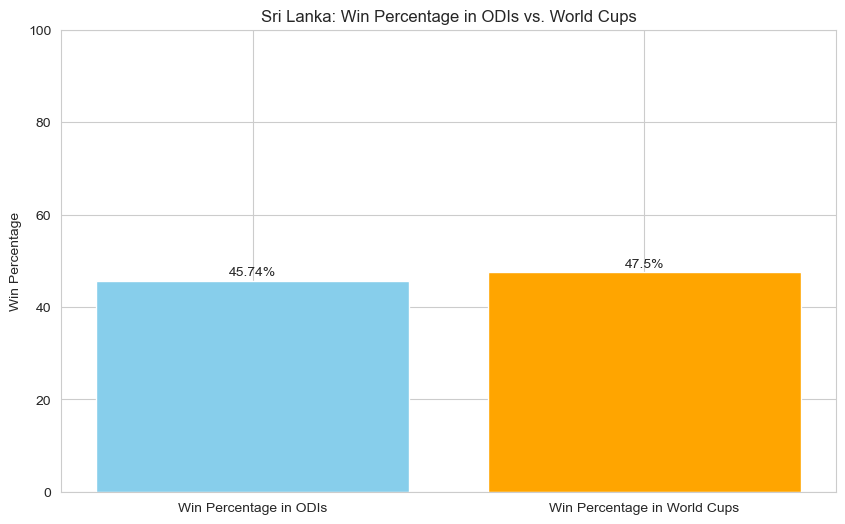

In [82]:
plt.figure(figsize=(10, 6))

categories = ['Win Percentage in ODIs', 'Win Percentage in World Cups']
percentages = [sri_lanka_wc_data['Win_percentage_ODI'].values[0], sri_lanka_wc_data['Win_percent_WC'].values[0]]

plt.bar(categories, percentages, color=['skyblue', 'orange'])
plt.title('Sri Lanka: Win Percentage in ODIs vs. World Cups')
plt.ylabel('Win Percentage')
plt.ylim(0, 100)
for i, value in enumerate(percentages):
    plt.text(i, value + 1, f"{value}%", ha='center')

plt.show()

### 3. Analyzing Sri Lanka's Recent Match Results

In [83]:
# Filter Sri Lanka's match results from the 'results' DataFrame
sri_lanka_results = results[(results['Team_1'] == 'Sri Lanka') | (results['Team_2'] == 'Sri Lanka')]

# Calculate wins and losses
sri_lanka_wins = sri_lanka_results[sri_lanka_results['Winner'] == 'Sri Lanka']
sri_lanka_losses = sri_lanka_results[(sri_lanka_results['Winner'] != 'Sri Lanka') & (sri_lanka_results['Winner'] != 'No result')]

# Counting wins and losses
sri_lanka_win_count = sri_lanka_wins.shape[0]
sri_lanka_loss_count = sri_lanka_losses.shape[0]

print(sri_lanka_win_count, sri_lanka_loss_count)

35 67


### 4. Visualization of Sri Lanka's Recent Match Outcomes

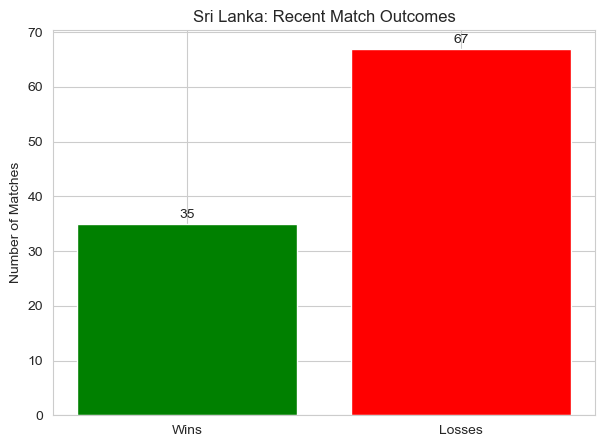

In [84]:
plt.figure(figsize=(7, 5))

outcomes = ['Wins', 'Losses']
counts = [sri_lanka_win_count, sri_lanka_loss_count]

plt.bar(outcomes, counts, color=['green', 'red'])
plt.title('Sri Lanka: Recent Match Outcomes')
plt.ylabel('Number of Matches')
for i, value in enumerate(counts):
    plt.text(i, value + 1, str(value), ha='center')

plt.show()

### 5. Visualization of Sri Lanka's ICC Ranking among Top 10 Teams

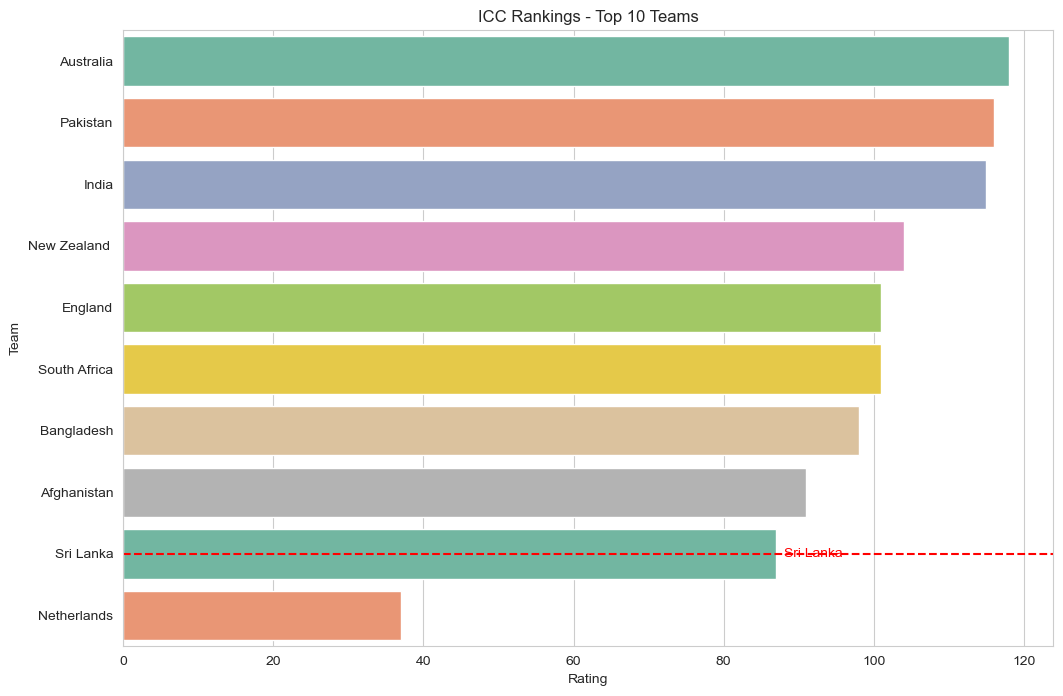

In [85]:
plt.figure(figsize=(12, 8))
# Assuming 'ranking' DataFrame is sorted by 'Rating' as in previous examples
sri_lanka_position = ranking[ranking['Team_name'] == 'Sri Lanka'].index[0]
sns.barplot(x='Rating', y='Team_name', data=ranking.head(10), palette='Set2')
plt.title('ICC Rankings - Top 10 Teams')
plt.xlabel('Rating')
plt.ylabel('Team')
plt.axhline(y=sri_lanka_position, color='red', linestyle='--')
plt.text(ranking.iloc[sri_lanka_position]['Rating'] + 1, sri_lanka_position, 'Sri Lanka', verticalalignment='center', color='red')
plt.show()

### 6. Visualization of Sri Lanka's World Cup 2023 Fixtures

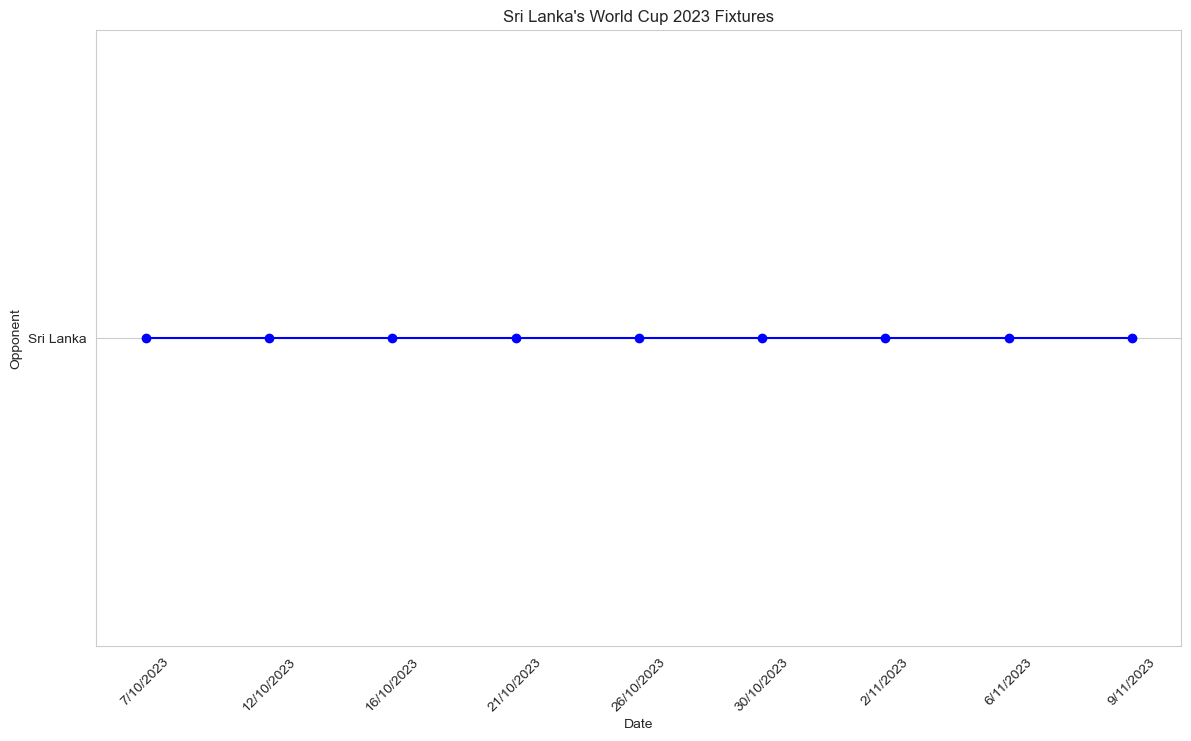

In [86]:
sri_lanka_fixtures = fixtures[(fixtures['Team_1'] == 'Sri Lanka') | (fixtures['Team_2'] == 'Sri Lanka')]
plt.figure(figsize=(14, 8))
plt.plot(sri_lanka_fixtures['Date'], sri_lanka_fixtures['Team_2'], marker='o', linestyle='-', color='blue')
plt.title("Sri Lanka's World Cup 2023 Fixtures")
plt.xlabel('Date')
plt.ylabel('Opponent')
plt.xticks(rotation=45)
plt.grid(axis='x')
plt.show()

### 7. Calculating win percentage against each team for Sri Lanka

In [87]:
sri_lanka_matches = results[(results['Team_1'] == 'Sri Lanka') | (results['Team_2'] == 'Sri Lanka')]
sri_lanka_wins = sri_lanka_matches[sri_lanka_matches['Winner'] == 'Sri Lanka']

wins_against_teams_sl = sri_lanka_wins.groupby(['Team_1', 'Team_2']).size().reset_index(name='Wins')
wins_against_teams_sl['Opponent'] = wins_against_teams_sl.apply(lambda row: row['Team_2'] if row['Team_1'] == 'Sri Lanka' else row['Team_1'], axis=1)
wins_summary_sl = wins_against_teams_sl.groupby('Opponent').agg({'Wins': 'sum'}).reset_index().sort_values(by='Wins', ascending=False)

total_matches_against_teams_sl = sri_lanka_matches.groupby(['Team_1', 'Team_2']).size().reset_index(name='Total Matches')
total_matches_against_teams_sl['Opponent'] = total_matches_against_teams_sl.apply(lambda row: row['Team_2'] if row['Team_1'] == 'Sri Lanka' else row['Team_1'], axis=1)
total_matches_summary_sl = total_matches_against_teams_sl.groupby('Opponent').agg({'Total Matches': 'sum'}).reset_index()
win_percentage_summary_sl = pd.merge(wins_summary_sl, total_matches_summary_sl, on='Opponent')
win_percentage_summary_sl['Win Percentage'] = (win_percentage_summary_sl['Wins'] / win_percentage_summary_sl['Total Matches']) * 100

In [88]:
sri_lanka_wins

,Date,Team_1,Team_2,Winner,Margin,Ground
53,07/11/2015,Sri Lanka,West Indies,Sri Lanka,Sri Lanka won by 19 runs,Pallekele International Cricket Stadium
93,16/06/2016,Ireland,Sri Lanka,Sri Lanka,won by 76 runs,The Village
94,18/06/2016,Ireland,Sri Lanka,Sri Lanka,won by 136 runs,The Village
144,14/11/2016,Zimbabwe,Sri Lanka,Sri Lanka,won by 8 wickets,Harare Sports Club
150,27/11/2016,Zimbabwe,Sri Lanka,Sri Lanka,won by 6 wickets,Queens Sports Club
284,25/01/2018,Bangladesh,Sri Lanka,Sri Lanka,won by 10 wickets,Shere Bangla National Stadium
286,27/01/2018,Bangladesh,Sri Lanka,Sri Lanka,won by 79 runs,Shere Bangla National Stadium
331,12/08/2018,Sri Lanka,South Africa,Sri Lanka,won by 178 runs,R Premadasa Stadium
441,04/06/2019,Afghanistan,Sri Lanka,Sri Lanka,won by 34 runs,Sophia Gardens
463,21/06/2019,England,Sri Lanka,Sri Lanka,won by 20 runs,Headingley


In [89]:
wins_summary_sl

,Opponent,Wins
14,West Indies,5
3,Bangladesh,4
0,Afghanistan,3
2,Australia,3
15,Zimbabwe,3
12,South Africa,3
9,Netherlands,2
8,Ireland,2
4,Bangladesh,2
1,Afghanistan,1


In [90]:
win_percentage_summary_sl

,Opponent,Wins,Total Matches,Win Percentage
0,West Indies,5,8,62.500000
1,Bangladesh,4,7,57.142857
2,Afghanistan,3,6,50.000000
3,Australia,3,5,60.000000
4,Zimbabwe,3,4,75.000000
5,South Africa,3,7,42.857143
6,Netherlands,2,2,100.000000
7,Ireland,2,2,100.000000
8,Bangladesh,2,5,40.000000
9,Afghanistan,1,2,50.000000


### 8. Plotting Team Sri Lanka's wins against other teams

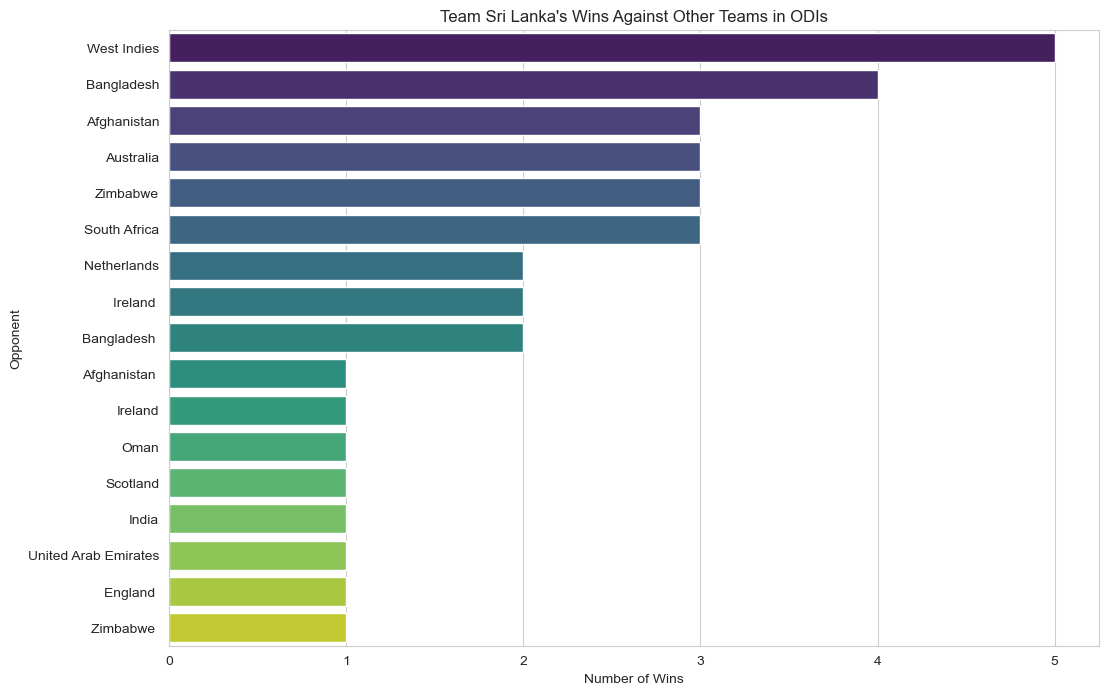

In [91]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Wins', y='Opponent', data=wins_summary_sl, palette='viridis')
plt.title("Team Sri Lanka's Wins Against Other Teams in ODIs")
plt.xlabel('Number of Wins')
plt.ylabel('Opponent')
plt.show()

## Feature selection:

In [92]:
worldcup_teams = ['England', 'South Africa', 'West Indies', 'Pakistan', 
                  'New Zealand', 'Sri Lanka', 'Afghanistan', 'Australia', 
                  'Bangladesh', 'India']

# Filter matches with World Cup teams
df_teams = results[(results['Team_1'].isin(worldcup_teams)) & (results['Team_2'].isin(worldcup_teams))]

# Removing unnecessary columns and reset index
df_teams = df_teams.drop(['Date', 'Margin', 'Ground'], axis=1).reset_index(drop=True)

## Preprocessing for Model Training

In [93]:
# Encode the 'Winner' as a numerical column
df_teams['winning_team'] = (df_teams['Winner'] == df_teams['Team_1']).astype(int)

# Create dummy variables
df_teams_final = pd.get_dummies(df_teams.drop('Winner', axis=1), columns=['Team_1', 'Team_2'])

# Split the data
X = df_teams_final.drop('winning_team', axis=1)
y = df_teams_final['winning_team']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Model Training and Evaluation

In [94]:
rf = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Model Evaluation
print(f"Training Accuracy: {rf.score(X_train, y_train):.3f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.3f}")

Training Accuracy: 0.760
Test Accuracy: 0.614


## Preparing dataset for prediction of world cup matches

In [95]:
print(ranking.columns)

Index(['Team_ranking', 'Team_name', 'Rating'], dtype='object')


In [96]:
# Correcting the column name from 'Position' to 'Team_ranking'
fixtures.insert(1, 'first_position', fixtures['Team_1'].map(ranking.set_index('Team_name')['Team_ranking']))
fixtures.insert(2, 'second_position', fixtures['Team_2'].map(ranking.set_index('Team_name')['Team_ranking']))

# Filling missing values with the mean position
fixtures['first_position'] = fixtures['first_position'].fillna(fixtures['first_position'].mean())
fixtures['second_position'] = fixtures['second_position'].fillna(fixtures['second_position'].mean())

## Predicting outcomes based on team positions

In [97]:
pred_set = []
for index, row in fixtures.iterrows():
    if row['first_position'] < row['second_position']:
        pred_set.append({'Team_1': row['Team_1'], 'Team_2': row['Team_2'], 'winning_team': None})
    else:
        pred_set.append({'Team_1': row['Team_2'], 'Team_2': row['Team_1'], 'winning_team': None})

## Transforming dataset for prediction

In [98]:
pred_set_df = pd.DataFrame(pred_set)
backup_pred_set = pred_set_df.copy()
pred_set_df = pd.get_dummies(pred_set_df, prefix=['Team_1', 'Team_2'], columns=['Team_1', 'Team_2'])

In [99]:
pred_set_df

,winning_team,Team_1_Afghanistan,Team_1_Australia,Team_1_Bangladesh,Team_1_England,Team_1_India,Team_1_New Zealand,Team_1_Pakistan,Team_1_Pakistan,Team_1_South Africa,...,Team_2_Afghanistan,Team_2_Bangladesh,Team_2_England,Team_2_India,Team_2_Netherlands,Team_2_New Zealand,Team_2_Pakistan,Team_2_South Africa,Team_2_Sri Lanka,Team_2_TBC
0,None,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,None,False,False,False,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
2,None,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,None,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
4,None,False,True,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
5,None,False,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
6,None,False,False,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
7,None,False,False,False,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
8,None,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
9,None,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


## Predictions for which team will win the match

In [104]:
# Step 1: Add missing columns in 'pred_set_df' that are present in 'X_train'
missing_cols = set(X_train.columns) - set(pred_set_df.columns)
for col in missing_cols:
    pred_set_df[col] = 0  

# Step 2: Remove columns in 'pred_set_df' that are not present in 'X_train'
extra_cols = set(pred_set_df.columns) - set(X_train.columns)
pred_set_df = pred_set_df.drop(columns=extra_cols, errors='ignore')  

# Step 3: Ensure the order of features in 'pred_set_df' matches that of 'X_train'
pred_set_df = pred_set_df[X_train.columns]

# Proceeding with match outcome predictions after ensuring feature consistency
predictions = rf.predict(pred_set_df)

# Assigning predictions back to the fixtures for interpretation
for i in range(len(predictions)):
    backup_pred_set.at[i, 'Predicted_Winner'] = backup_pred_set.at[i, 'Team_1'] if predictions[i] == 1 else backup_pred_set.at[i, 'Team_2']

# Displaying predicted winners for each fixture
print(backup_pred_set[['Team_1', 'Team_2', 'Predicted_Winner']])

          Team_1        Team_2 Predicted_Winner
0        England   New Zealand          England
1      Pakistan    Netherlands        Pakistan 
2     Bangladesh   Afghanistan       Bangladesh
3   South Africa     Sri Lanka        Sri Lanka
4      Australia         India            India
5    New Zealand   Netherlands      New Zealand
6        England    Bangladesh          England
7          India   Afghanistan            India
8      Pakistan      Sri Lanka        Pakistan 
9      Australia  South Africa        Australia
10   New Zealand    Bangladesh      New Zealand
11       England   Afghanistan          England
12      Pakistan         India            India
13     Australia     Sri Lanka        Australia
14  South Africa   Netherlands     South Africa
15   New Zealand   Afghanistan      New Zealand
16         India    Bangladesh            India
17     Australia      Pakistan        Australia
18     Sri Lanka   Netherlands        Sri Lanka
19       England  South Africa     South

## Identifying the Semi-finalists

In [105]:
# Counting wins for each team
win_counts = backup_pred_set['Predicted_Winner'].value_counts()

# Identifying the top 4 teams with the most wins
semi_finalists = win_counts.nlargest(4).index.tolist()
print(f"Semi-finalists: {semi_finalists}")

Semi-finalists: ['Australia', 'England', 'India', 'South Africa']


## Predicting the Semi-finals and Identifying Finalists

In [106]:
# Semi-final matchups (Example based on league stage outcomes)
semi_final_matches = [(semi_finalists[0], semi_finalists[3]), 
                      (semi_finalists[1], semi_finalists[2])]

# Predicting semi-final winners (Simplified prediction process)
semi_final_winners = []
for match in semi_final_matches:
    # Creating a feature set for the match
    match_features = X_train.head(1).copy()  
    # Resetting all columns to 0
    for col in match_features.columns:
        if 'Team_1_' in col:
            match_features[col] = 1 if col.endswith(match[0]) else 0
        elif 'Team_2_' in col:
            match_features[col] = 1 if col.endswith(match[1]) else 0
    
    # Predicting the winner
    winner_index = rf.predict(match_features)[0]
    winner = match[0] if winner_index == 1 else match[1]
    semi_final_winners.append(winner)

print(f"Teams advancing to the final: {semi_final_winners}")

Teams advancing to the final: ['Australia', 'England']


## Predicting the World Cup Winner

In [107]:
# Final match
final_match = tuple(semi_final_winners)

# Predicting the World Cup winner
final_match_features = X_train.head(1).copy()  
for col in final_match_features.columns:
    if 'Team_1_' in col:
        final_match_features[col] = 1 if col.endswith(final_match[0]) else 0
    elif 'Team_2_' in col:
        final_match_features[col] = 1 if col.endswith(final_match[1]) else 0

world_cup_winner_index = rf.predict(final_match_features)[0]
world_cup_winner = final_match[0] if world_cup_winner_index == 1 else final_match[1]

print(f"The predicted winner of the ICC World Cup 2023 is: {world_cup_winner}")

The predicted winner of the ICC World Cup 2023 is: Australia
